# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---
- **Assessment criteria**
  - Graded on **both correctness and presentation**.
  - Make results easy to read: apply **string formatting**, include **plots** when useful, and **comment your code**.

- **Testing**
  - There are **no OK tests** for this assignment.
  - You are expected to **explore the data and problem**, and use a **search engine** to identify appropriate pandas functions.
  - See `veryUseful.py` for a short list of potentially helpful pandas functions.

- **Collaboration**
  - This is **group work**; consider dividing tasks.
  - Some team members can focus on the **pandas/data analysis** component, others on the **algorithmic** component.
  - **Intermediate results** are provided to **test your algorithm**; you can begin both parts immediately (see **Question 3** for details).

- **Use of generative AI**
  - **Permitted only in Part 3** of the assignment.
  - If used (or if other external sources are used) in Part 3, **clearly document how** you used them.
  - **Not allowed** in the other parts.
---


## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission
Submit your work via GitHub, following the detailed instructions provided in the assessment submission guidelines.


## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [26]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

### Q0: EDA

In [27]:
# Check mismatch between names_dict and columns of price_data
data_columns = price_data.columns.to_list()
names_list = list(names_dict.keys())

no_price_data = [comp for comp in names_list if comp not in data_columns]
no_price_data 

['CSRA', 'FTV', 'HPE', 'KHC', 'NEE', 'PYPL', 'WRK', 'WLTW']

In [28]:
# Check for Null
price_data.isna().sum().sum()

np.int64(0)

##### Remarks
- We see that there are six tickers missing from our price data.  
- No missing values

### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [29]:
# Calculate company returns in this cell
ret = price_data.pct_change().dropna()
ret.head()

MMM       ABT      ABBV       ACN      ATVI       AYI  \
Date                                                                     
2015-01-05 -0.022553  0.000223 -0.018819 -0.016884 -0.013910 -0.024021   
2015-01-06 -0.010664 -0.011356 -0.004950 -0.007213 -0.018640 -0.012526   
2015-01-07  0.007249  0.008108  0.040417  0.020989 -0.021561  0.017729   
2015-01-08  0.023967  0.020554  0.010459  0.015249  0.009969  0.034985   
2015-01-09 -0.012284 -0.010508 -0.027355 -0.001113 -0.018182  0.066901   

                ADBE       AAP       AES       AET  ...       XEL       XRX  \
Date                                                ...                       
2015-01-05 -0.004976 -0.013181 -0.028467 -0.013514  ... -0.011351 -0.021818   
2015-01-06 -0.020145 -0.000703 -0.022539  0.001484  ...  0.005321 -0.013383   
2015-01-07  0.008223  0.021489  0.001537  0.020061  ...  0.008635  0.012811   
2015-01-08  0.025453  0.008765  0.015349  0.032406  ...  0.011599  0.027530   
2015-01-09 -0.014811 -0.005089 -0.024943 -0.014612  ... -0.012285 -0.005793   

                XLNX        XL       XYL      YHOO       YUM       ZBH  \
Date                                                                     
2015-01-05 -0.018349  0.006096 -0.062237 -0.020729 -0.020318  0.037304   
2015-01-06 -0.014486  0.004905 -0.005881  0.001628 -0.012274 -0.008477   
2015-01-07  0.000474  0.000574  0.007887 -0.012599  0.033138  0.024870   
2015-01-08  0.022275  0.016356  0.007546  0.033752  0.017420  0.010617   
2015-01-09 -0.000927  0.012987 -0.018863 -0.010153 -0.001767 -0.014424   

                ZION       ZTS  
Date                            
2015-01-05 -0.037469 -0.006003  
2015-01-06 -0.038193 -0.009756  
2015-01-07  0.009546  0.020643  
2015-01-08  0.013994  0.015399  
2015-01-09 -0.027975  0.001584  

[5 rows x 496 columns]

### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [30]:
# use stack() to conver to long format
stacked_ret = ret.stack() # (date, ticker) multi-index
stacked_ret.name = "return"
stacked_ret = stacked_ret.reset_index(drop=False) # three columns (Date, level_1, return)
stacked_ret.columns = ["Date", "Ticker", "Return"]
stacked_ret.head() 

Date Ticker    Return
0  2015-01-05    MMM -0.022553
1  2015-01-05    ABT  0.000223
2  2015-01-05   ABBV -0.018819
3  2015-01-05    ACN -0.016884
4  2015-01-05   ATVI -0.013910

In [31]:
# Top 10 daily returns
stacked_ret.nlargest(10, 'Return')

Date Ticker    Return
81044   2015-08-27    FCX  0.286616
58018   2015-06-22    WMB  0.258999
97657   2015-10-14   TRIP  0.255361
8646    2015-01-29    HAR  0.237600
106015  2015-11-06   QRVO  0.232254
93733   2015-10-02   WYNN  0.228389
13833   2015-02-12   TRIP  0.224915
49829   2015-05-29    HUM  0.203128
99952   2015-10-21   KLAC  0.187895
32088   2015-04-08   PRGO  0.183899

##### Reasons behind the top 10 daily returns

1. **FCX: Freeport McMoran**

On August 27, 2015, FCX shares jumped nearly 30% after activist investor Carl Icahn disclosed an 8.5% stake and became the largest shareholder. Moreover, the company announced reduction in capital expenditures, cutting its mining budget by 25% and reducing U.S. mining staff by about 10% (Nasdaq.com,2015). 
 

2. ‌**WMB: Williams Companies**

On June 22, 2015, Williams’s stock jumped about 26% after Energy Transfer Equity made an unsolicited $64/share all-equity offer (around $53.1 billion total), representing 32% premium over the prior trading price, fuelling takeover speculation and a surge in the stock (Terry-Cobo,2015). 
 

3. **TRIP: TripAdvisor**  
 
Coming on third and seventh place, TripAdvisor reported quarterly revenue of US $288 million on February 12, 2015, representing a 35% year-over-year increase, driven by broad-based growth across all its product categories (Nasdaq.com, 2015). Later in the year, TripAdvisor’s shares jumped about 23% after the company announced a strategic partnership with The Priceline Group, allowing some of Priceline’s online travel brands to integrate into TripAdvisor’s Instant Booking platform (Nasdaq.com, 2015). 
 


 
4. **HAR: Harman international** 

On January 29, 2015, Harman International reported Q2 net sales of $1.58 billion, up 19% year-over-year and adjusted EPS, beating consensus estimates, driving strong investor confidence (HARMAN Newsroom, 2015). 
  

5. **QRVO: Qorvo**  

On November 6, 2015, Qorvo shares surged after the company reported stronger-than-expected revenue and earnings for its fiscal second quarter, surpassing analyst forecasts and signalling robust growth (Bizjournals.com, 2015). 
 

6. **WYNN: Wynn resort**

After China’s central government indicated it would “support Macau’s economy in all aspects,” Wynn Resorts shares surged over 20% on October 2, 2015 — leading gains among Macau gaming stocks (Nasdaq.com, 2015). 
 

7. **HUM: Humana Inc.**

Humana’s stock spiked sharply after reports surfaced that the company had attracted takeover interest and was working with Goldman Sachs on a potential sale. Speculated bidders included Aetna and Cigna. Following the trading halt that accompanied the news, investors pushed the share price up 19% (Pramuk, 2015). 
 

8. **KLAC: KLA Corporation**

On October 21, 2015, KLA Corporation shares soared around 25 % after Lam Research announced a $10.6 billion merger proposal to acquire KLA in a transaction combining cash and stock. The offer was roughly $32 per share, a premium over KLA’s trading price, and both boards had approved the deal. The prospect of creating a more powerful, integrated semiconductor‐equipment entity drove strong investor sentiment (Bylund. 2015). 
 

9. **PRGO: Perrigo**

In April 2015, Mylan proposed a $29 billion cash-and-stock offer to acquire Perrigo, valuing the company at $205 per share, a premium exceeding 25% over Perrigo’s closing price before the announcement. After a brief trading halt, Perrigo’s stock climbed sharply, reflecting investor excitement over the deal. (Pramuk, 2015) 


**Summary:** 

In summary, nearly every instance of an extraordinarily high daily return among the ten stocks can be traced back to a major corporate announcement. In most cases, that announcement involved either a merger, acquisition, or strategic partnership, which immediately altered investors’ expectations about the company’s future prospects. In the remaining cases, the surge resulted from shifts in the company’s external or internal environment such as the arrival of an activist stakeholder or earnings that significantly exceeded consensus forecasts. 


In [32]:
# Bottom 10 daily returns
stacked_ret.nsmallest(10, 'Return')

Date Ticker    Return
98577   2015-10-16    PWR -0.285006
48903   2015-05-27   KORS -0.241954
69013   2015-07-24   BIIB -0.220802
101099  2015-10-23   SRCL -0.192767
95228   2015-10-07    YUM -0.188324
10769   2015-02-04     RL -0.182169
59817   2015-06-26     MU -0.181515
115399  2015-12-04    NRG -0.179581
106423  2015-11-09    MNK -0.169981
102190  2015-10-28   AKAM -0.167306

##### Reasons behind the bottom 10 daily returns

1. **PWR: Quanta Services Inc**

On the 16th of October 2015, Quanta Serices experienced its largest daily retreat in stock price. This amounted to a 29% drawdown. This was due to a downward revision in Q3 performance. (The Motley Fool, 2015)

2. **KORS: Michael Kors**

Despite reporting an increase in revenue YoY, Michael Kors missed Q4 earnings estimates and revised their forward guidance downwards. This resulted in a 24% decline in their share price on the 27th of May 2015. (The Motley Fool, 2015)

3. **BIIB: Biogen Inc.**

A revision of revenue growth downwards (more than 50%) fuelled a 22% drop in Biogen’s share price.  The revision downwards was released as part of Q2 2015 reporting. Despite, reporting rising revenues, major revenue generators such as Tecfidera, Avonex and Tysabri were forecasted to generate less than previously expected. (Peter Neil, 2015)

4. **SRCL: Stericycle Inc.**

A strong USD, lower hazardous-waste volume and higher-than-expected expenses dragged on non-GAAP earnings in Q3 2015 reporting for Stericycle. The retreat of c. 20% shows that this earnings release was not in-line with the street’s estimates. (The Motley Fool, 2015)

5. **YUM: Yum Brands Inc’s**

A slowing Chinese economy amidst an international expansion plan contributed to poor results for Yum in their Q3 earnings release. With 6,900 restaurants located in China, it was no surprise that the equity fell nearly 20%. (Lisa Baertlein, 2015)

6. **RL: Ralph Lauren**

A strong USD in 2015 resulted in and EPS miss for Ralph Lauren in their Q3 earnings report. Accounting for currency, the revenue also came in lower than expected (4% vs 5-7% expected). (The Motley Fool, 2015)

7. **MU: Micron Technology**

Q3 for Micron Technology brough a seriously disappointing performance with third quarter profit dropping 39%. The Chipmaker subsequently slid 18%. (Reuters, 2015)
 
8. **NRG: NRG Energy**

2015 represented a tough year for NRG technology. The resignation of CEO David Crane in December drove the stock prices to decade lows. The 17% retreat brought the equities to levels not seen since 2004. (Reuters, 2015)

9. **MNK: Mallinckrodt**

A tweet and not an earnings release was the key contributor to the 17% drop in MNK. Citron, a short selling researcher, called MNK ‘a far worse offender of the reimbursement system’ in a tweet. (Reuters, 2015)
 
10. **AKAM: Akamai**
 
Akamai’s stock fell sharply about 14% in after-hours trading on October 28, 2015 depsite beating expectations for its Q3 results. The drop was driven by its weaker than expected guidance for Q4, which rasied concerns about slower growth ahead, partly due to currency headwinds and demmnd from key media customers. (The Motely Fool, 2015)
 
**Summary:**  

In nearly all instances, the drawdown in equity pricing was due to an earnings miss. This is a key example of how prices reflect all information concerning a company (Analyst’s expectations) and how as new information comes to surface (Miss/Beat) the share price will move accordingly (in the instance of earnings underperforming the share price will reprice downwards.
 
 
 
 

### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [33]:
# Convert index to DatetimeIndex for resampling
yearly_ret = ret.copy()
yearly_ret = 1 + yearly_ret # change to gross ret
yearly_ret.index = pd.to_datetime(ret.index)
yearly_ret = yearly_ret.resample("YE").apply(np.prod) # take product to get cumulative returns over a year and then subtract by 1
yearly_ret = yearly_ret - 1 # get yearly returns
yearly_ret.head()

C:\Users\jayju\AppData\Local\Temp\ipykernel_23356\616700546.py:5: FutureWarning: The provided callable <function prod at 0x000001BE47134D60> is currently using DatetimeIndexResampler.prod. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "prod" instead.
  yearly_ret = yearly_ret.resample("YE").apply(np.prod) # take product to get cumulative returns over a year and then subtract by 1


MMM      ABT      ABBV       ACN      ATVI       AYI  \
Date                                                                    
2015-12-31 -0.057624  0.02144 -0.071393  0.201626  0.942684  0.676443   

               ADBE       AAP       AES       AET  ...       XEL       XRX  \
Date                                               ...                       
2015-12-31  0.29859 -0.049328 -0.278381  0.229282  ...  0.032695 -0.207025   

                XLNX        XL       XYL      YHOO       YUM       ZBH  \
Date                                                                     
2015-12-31  0.108464  0.159639 -0.026044 -0.337054  0.032109 -0.081229   

                ZION       ZTS  
Date                            
2015-12-31 -0.027638  0.114511  

[1 rows x 496 columns]

In [34]:
# melt to get long form
yearly_ret_long = yearly_ret.reset_index().melt(id_vars = "Date", value_name= "Yearly Return", var_name="Ticker")
yearly_ret_long.head()

Date Ticker  Yearly Return
0 2015-12-31    MMM      -0.057624
1 2015-12-31    ABT       0.021440
2 2015-12-31   ABBV      -0.071393
3 2015-12-31    ACN       0.201626
4 2015-12-31   ATVI       0.942684

In [35]:
# 10 highest yearly returns
yearly_ret_long.nlargest(10, "Yearly Return")

Date Ticker  Yearly Return
313 2015-12-31   NFLX       1.294549
27  2015-12-31   AMZN       1.190750
4   2015-12-31   ATVI       0.942684
5   2015-12-31    AYI       0.676443
329 2015-12-31   NVDA       0.664514
207 2015-12-31    GPN       0.600933
226 2015-12-31    HRL       0.559016
175 2015-12-31    EXR       0.544469
463 2015-12-31   VRSN       0.527540
378 2015-12-31    RAI       0.497837

In [36]:
# 10 smallest yearly returns
yearly_ret_long.nsmallest(10, "Yearly Return")

Date Ticker  Yearly Return
96  2015-12-31    CHK      -0.769785
403 2015-12-31    SWN      -0.738314
196 2015-12-31    FCX      -0.703792
255 2015-12-31    KMI      -0.632032
297 2015-12-31     MU      -0.592518
327 2015-12-31    NRG      -0.559234
371 2015-12-31    RRC      -0.553864
280 2015-12-31    MRO      -0.546383
307 2015-12-31    MUR      -0.538541
485 2015-12-31   WYNN      -0.516602

### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

In [37]:
# We assume serial independence to annualize daily standard deviation by multiplying sqrt(251)
yearly_vol = ret.std() * np.sqrt(251) # 251 business days in 2015
yearly_vol.name = "yearly volatility"

# 10 highest yearly volatilities
yearly_vol.reset_index().nlargest(10, "yearly volatility")

index  yearly volatility
196   FCX           0.698220
96    CHK           0.677823
440   RIG           0.594958
403   SWN           0.557654
485  WYNN           0.553204
367  QRVO           0.530311
279   MNK           0.516055
482   WMB           0.510519
371   RRC           0.509703
313  NFLX           0.506578

In [38]:
# 10 lowest yearly volatilities
yearly_vol.reset_index().nsmallest(10, "yearly volatility")

index  yearly volatility
427    KO           0.143584
100   CHD           0.152069
49    AJG           0.153846
342   PEP           0.153878
426   CLX           0.154073
130   DVA           0.156568
51      T           0.157528
465    VZ           0.157622
377   RSG           0.158002
359    PG           0.160107

### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [39]:
# Your code here
ret_corr = ret.corr()
ret_corr.head() # Show section of correlation matrix

MMM       ABT      ABBV       ACN      ATVI       AYI      ADBE  \
MMM   1.000000  0.598666  0.322637  0.632059  0.418550  0.450897  0.468755   
ABT   0.598666  1.000000  0.483669  0.644081  0.434370  0.494315  0.585671   
ABBV  0.322637  0.483669  1.000000  0.318051  0.226868  0.269096  0.347337   
ACN   0.632059  0.644081  0.318051  1.000000  0.462545  0.481296  0.560759   
ATVI  0.418550  0.434370  0.226868  0.462545  1.000000  0.310464  0.482777   

           AAP       AES       AET  ...       XEL       XRX      XLNX  \
MMM   0.257132  0.335378  0.317374  ...  0.409630  0.499817  0.507630   
ABT   0.371080  0.450213  0.464380  ...  0.453393  0.538242  0.507487   
ABBV  0.292497  0.303990  0.419365  ...  0.261256  0.291590  0.323337   
ACN   0.303227  0.395830  0.401335  ...  0.388994  0.531886  0.510191   
ATVI  0.223484  0.198134  0.285121  ...  0.295291  0.369757  0.398586   

            XL       XYL      YHOO       YUM       ZBH      ZION       ZTS  
MMM   0.543733  0.623741  0.316706  0.356204  0.433634  0.486263  0.293897  
ABT   0.619810  0.567309  0.376226  0.388070  0.640907  0.512479  0.463925  
ABBV  0.267436  0.321926  0.307020  0.289728  0.508626  0.323670  0.406247  
ACN   0.563153  0.615349  0.431369  0.353528  0.461188  0.546654  0.414050  
ATVI  0.388827  0.397004  0.365900  0.330467  0.370687  0.346790  0.323141  

[5 rows x 496 columns]

### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [40]:
# Your code here
def n_correlated_companies(corr_df : pd.DataFrame, ticker : str, n : int) -> list:
    """
    Parameters:
        corr_df : pd.DataFrame
            N x N correlation matrix, where N is number of assets
        ticker : str
            ticker of company that we wish to analyze
        n : int
            number of companies most and least correlated to the target company
    
    Returns:
        A list that contains two lists. 
            First list contains n tuples of form (ticker, correlation) corresponding to the most correlated companies
            Second list contains n tuples of form (ticker, correlation) corresponding to the least correlated companies
    """
    # Convert correlation matrix to long format
    corr_long = corr_df.reset_index().melt(id_vars = "index", value_name = "corr", var_name="ticker")
    n_largest = corr_long.query(f"index == '{ticker}' and ticker != '{ticker}'").nlargest(n, "corr")
    n_smallest = corr_long.query(f"index == '{ticker}' and ticker != '{ticker}'").nsmallest(n, "corr")

    n_largest_list = []
    n_smallest_list = []
    for index, row in n_largest.iterrows():
        top_corr = (row["ticker"], row["corr"])
        n_largest_list.append(top_corr)
    
    for index, row in n_smallest.iterrows():
        bottom_corr = (row["ticker"], row["corr"])
        n_smallest_list.append(bottom_corr)
    
    output = [n_largest_list, n_smallest_list]
    
    return output

def print_topn_bottomn(corr_df : pd.DataFrame, ticker : str, n : int):
    """
    Print results in pretty format
    """
    output = n_correlated_companies(corr_df= corr_df, ticker = ticker, n = n)
    for i in range(2):
        if i == 0: # top n
            for j in range(n):
                print(f"Top {j+1} correlated stock is {output[i][j][0]}")
        elif i == 1: # bottom n
            for j in range(n):
                print(f"Bottom {j+1} correlated stock is {output[i][j][0]}")

# Print top 10 and bottom 10 correlated stocks for google
print_topn_bottomn(corr_df= ret_corr, ticker = "GOOG", n = 10)

Top 1 correlated stock is GOOGL
Top 2 correlated stock is AMZN
Top 3 correlated stock is FB
Top 4 correlated stock is PGR
Top 5 correlated stock is MSFT
Top 6 correlated stock is MA
Top 7 correlated stock is SBUX
Top 8 correlated stock is HON
Top 9 correlated stock is HSIC
Top 10 correlated stock is FISV
Bottom 1 correlated stock is SRCL
Bottom 2 correlated stock is RIG
Bottom 3 correlated stock is DO
Bottom 4 correlated stock is RRC
Bottom 5 correlated stock is URBN
Bottom 6 correlated stock is SWN
Bottom 7 correlated stock is NEM
Bottom 8 correlated stock is CHK
Bottom 9 correlated stock is NRG
Bottom 10 correlated stock is DISCA


In [41]:
# Take a look at company , correlation pair

# Google
n_correlated_companies(corr_df= ret_corr, ticker = "GOOG", n = 5)

[[('GOOGL', 0.9893650403946367),
  ('AMZN', 0.584337165609492),
  ('FB', 0.5692559103219069),
  ('PGR', 0.5479131307967529),
  ('MSFT', 0.5205625110597928)],
 [('SRCL', 0.017148943478535007),
  ('RIG', 0.023043978286836898),
  ('DO', 0.0537338137664369),
  ('RRC', 0.05677426433704295),
  ('URBN', 0.06746135962666808)]]

In [42]:
# Facebook
n_correlated_companies(corr_df= ret_corr, ticker = "FB", n = 5)

[[('FISV', 0.6196667113100133),
  ('MA', 0.6176586356768465),
  ('SBUX', 0.5981902921801381),
  ('GOOGL', 0.5865476662500515),
  ('TSS', 0.580213738241196)],
 [('NEM', -0.0028322700162479162),
  ('RIG', 0.013326555431120768),
  ('SWN', 0.047666560515331115),
  ('DO', 0.05430954181927569),
  ('CHK', 0.0586821027529903)]]

In [43]:
# Amazon
n_correlated_companies(corr_df= ret_corr, ticker = "AMZN", n = 5)

[[('GOOGL', 0.5855531323602523),
  ('GOOG', 0.584337165609492),
  ('SBUX', 0.5719510377436501),
  ('V', 0.5607044028255768),
  ('MA', 0.5387081334232423)],
 [('SRCL', 0.05645061795663578),
  ('RIG', 0.06016160897555293),
  ('SWN', 0.08237627406253434),
  ('TRIP', 0.08768372088400926),
  ('WFM', 0.0906999068867834)]]

In [44]:
# Microsoft
n_correlated_companies(corr_df= ret_corr, ticker = "MSFT", n = 5)

[[('MMC', 0.60454888315055),
  ('PG', 0.6042044450605105),
  ('MA', 0.5908862934433519),
  ('ADP', 0.5894447396591711),
  ('SBUX', 0.5837047838609107)],
 [('SRCL', 0.028886760198836244),
  ('NRG', 0.09076139667518143),
  ('RIG', 0.11378517777722416),
  ('SWN', 0.11478651315424668),
  ('URBN', 0.1287878682452084)]]

In [45]:
# Apple
n_correlated_companies(corr_df= ret_corr, ticker = "AAPL", n = 5)

[[('ITW', 0.6012654342849203),
  ('NOC', 0.589367776986826),
  ('HON', 0.5767295014864411),
  ('FISV', 0.5739352682800534),
  ('SWKS', 0.5733498437510143)],
 [('RRC', 0.1127108755839607),
  ('CMG', 0.1305011854095386),
  ('NEM', 0.14371255009668252),
  ('RIG', 0.14404457195308107),
  ('SWN', 0.1468105388053012)]]

##### Remarks
- It is hard to say the result was expected except for Google. The top three correlated stocks in 2015 were all tech stocks, which is quite an intuitive result.
- However, Facebook displayed stock correlation with Mastercard and Fiserv, which are both financial services company that are involved in the payments industry. 
- We also see Starbucks being included in the top five correlated stocks for three of the five tech stocks. This may indicate that there were common factors driving the returns for the tech stocks and Starbucks (consumer discretionary).
- Interestingly, in 2015, four out of the top five correlated stocks with Microsoft are all not tech stocks (except for Automatic Data Processing). This indicates that our intuition may not always hold.
- Similarly, Apple's top three correlated stocks in 2015 were all Industrial stocks, indicating that Apple may have behaved more like an Industrial stock for that period.

## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [46]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edges = create_correlation_list(correl = ret_corr)

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [47]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(np.float64(0.598666164029738), 'MMM', 'ABT'),
 (np.float64(0.32263699601940254), 'MMM', 'ABBV'),
 (np.float64(0.6320593488560189), 'MMM', 'ACN'),
 (np.float64(0.41855006701119907), 'MMM', 'ATVI'),
 (np.float64(0.4508974957132859), 'MMM', 'AYI'),
 (np.float64(0.4687548443045165), 'MMM', 'ADBE'),
 (np.float64(0.25713165217544326), 'MMM', 'AAP'),
 (np.float64(0.33537796741224424), 'MMM', 'AES'),
 (np.float64(0.31737374099675925), 'MMM', 'AET'),
 (np.float64(0.5059306055816828), 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [48]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    while next_nodes[node] != node:
        node = next_nodes[node]
    return node


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    assert node1 != node2, "Input different nodes"
    # Find clusters corresponding to node1 and node2
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)
    
    # Case 1: if two nodes have same bottom, they are already in same cluster. do nothing.
    if bottom1 == bottom2:
        return
    
    # Case 2: if two nodes have differing bottoms, they are in different clusters. Merge.
    else:
        next_nodes[bottom1] = bottom2 # Connect bottom1 to bottom2
        # remove bottom node from set_starters (only when starter_node == bottom_node, i.e., single set cluster)
        set_starters.discard(bottom2)  # discard doesn't raise any keyerror even if bottom node is not in set_starters
        
    
    
def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edges, key = lambda s: s[0])
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        # get highest corr, along with starting node and ending node (pop from list)
        triple = sorted_edges.pop()
        corr = triple[0]
        source = triple[1]
        destination = triple[2]

        merge_sets(source, destination, next_nodes, set_starters)
        
        
    return set_starters, next_nodes

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [49]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

# run algo
set_starters, next_nodes = cluster_correlations(edges, firms, k = 200) 
all_clusters = construct_sets(set_starters,next_nodes)

In [50]:
all_clusters

{'CTXS': {'CTXS'},
 'AES': {'AES'},
 'SPG': {'AIV',
  'AVB',
  'BXP',
  'EQR',
  'ESS',
  'FRT',
  'GGP',
  'KIM',
  'SLG',
  'SPG',
  'UDR',
  'VNO'},
 'FB': {'FB'},
 'EA': {'EA'},
 'BSX': {'BSX'},
 'PBI': {'PBI'},
 'BIIB': {'BIIB'},
 'RCL': {'RCL'},
 'WAT': {'WAT'},
 'AMP': {'AMP'},
 'FFIV': {'FFIV'},
 'CINF': {'CINF'},
 'STJ': {'STJ'},
 'PG': {'PG'},
 'GLW': {'GLW'},
 'FLS': {'FLS'},
 'ATVI': {'ATVI'},
 'HAS': {'HAS'},
 'MSFT': {'MSFT'},
 'NEM': {'NEM'},
 'HPQ': {'HPQ'},
 'AKAM': {'AKAM'},
 'FAST': {'FAST'},
 'DD': {'DD'},
 'PCG': {'AEE',
  'AEP',
  'CMS',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'LNT',
  'PCG',
  'PNW',
  'SCG',
  'SO',
  'WEC',
  'XEL'},
 'COH': {'COH'},
 'PEP': {'PEP'},
 'LM': {'LM'},
 'URI': {'URI'},
 'WHR': {'WHR'},
 'EW': {'EW'},
 'IRM': {'IRM'},
 'FLR': {'FLR'},
 'GIS': {'GIS'},
 'HUM': {'HUM'},
 'SHW': {'SHW'},
 'XEC': {'XEC'},
 'AMT': {'AMT'},
 'DPS': {'DPS'},
 'M': {'M'},
 'ADP': {'ADP'},
 'FISV': {'FISV'},
 'O': {'O'},
 'ULTA': {'ULTA'},
 'ACN'

In [51]:
# Sanity check: confirm that within cluster stocks have high correlation with each other
test_cluster = list(all_clusters["PCG"])
ret_corr.loc[test_cluster, test_cluster]

CMS       LNT       AEP        ES       PNW       DUK       XEL  \
CMS  1.000000  0.871166  0.866104  0.884472  0.871274  0.852370  0.908582   
LNT  0.871166  1.000000  0.873191  0.875428  0.863054  0.832042  0.874108   
AEP  0.866104  0.873191  1.000000  0.876456  0.874326  0.862135  0.887959   
ES   0.884472  0.875428  0.876456  1.000000  0.874244  0.852520  0.899818   
PNW  0.871274  0.863054  0.874326  0.874244  1.000000  0.829312  0.894365   
DUK  0.852370  0.832042  0.862135  0.852520  0.829312  1.000000  0.846478   
XEL  0.908582  0.874108  0.887959  0.899818  0.894365  0.846478  1.000000   
D    0.844955  0.832979  0.858405  0.846337  0.824202  0.832862  0.848827   
WEC  0.895592  0.861913  0.863816  0.885898  0.866847  0.846176  0.890647   
PCG  0.843531  0.802615  0.820468  0.814006  0.822056  0.794259  0.834803   
ED   0.838944  0.832106  0.839004  0.843795  0.862533  0.826042  0.860675   
SO   0.834962  0.843403  0.858048  0.849333  0.842254  0.885128  0.853196   
DTE  0.917447  0.873250  0.890412  0.893180  0.890975  0.878369  0.905672   
AEE  0.865751  0.894195  0.853375  0.876894  0.863681  0.820549  0.877466   
EIX  0.820737  0.784032  0.817336  0.826124  0.796317  0.792344  0.842257   
SCG  0.880851  0.863754  0.852436  0.876109  0.870393  0.847252  0.879547   

            D       WEC       PCG        ED        SO       DTE       AEE  \
CMS  0.844955  0.895592  0.843531  0.838944  0.834962  0.917447  0.865751   
LNT  0.832979  0.861913  0.802615  0.832106  0.843403  0.873250  0.894195   
AEP  0.858405  0.863816  0.820468  0.839004  0.858048  0.890412  0.853375   
ES   0.846337  0.885898  0.814006  0.843795  0.849333  0.893180  0.876894   
PNW  0.824202  0.866847  0.822056  0.862533  0.842254  0.890975  0.863681   
DUK  0.832862  0.846176  0.794259  0.826042  0.885128  0.878369  0.820549   
XEL  0.848827  0.890647  0.834803  0.860675  0.853196  0.905672  0.877466   
D    1.000000  0.837148  0.782313  0.805463  0.832962  0.878233  0.839890   
WEC  0.837148  1.000000  0.827918  0.873550  0.852549  0.899696  0.858439   
PCG  0.782313  0.827918  1.000000  0.806779  0.796801  0.846831  0.801712   
ED   0.805463  0.873550  0.806779  1.000000  0.858347  0.856081  0.808454   
SO   0.832962  0.852549  0.796801  0.858347  1.000000  0.864352  0.820465   
DTE  0.878233  0.899696  0.846831  0.856081  0.864352  1.000000  0.882825   
AEE  0.839890  0.858439  0.801712  0.808454  0.820465  0.882825  1.000000   
EIX  0.771612  0.817700  0.810876  0.751106  0.764036  0.852732  0.805863   
SCG  0.846348  0.882744  0.827542  0.844075  0.864424  0.882498  0.861605   

          EIX       SCG  
CMS  0.820737  0.880851  
LNT  0.784032  0.863754  
AEP  0.817336  0.852436  
ES   0.826124  0.876109  
PNW  0.796317  0.870393  
DUK  0.792344  0.847252  
XEL  0.842257  0.879547  
D    0.771612  0.846348  
WEC  0.817700  0.882744  
PCG  0.810876  0.827542  
ED   0.751106  0.844075  
SO   0.764036  0.864424  
DTE  0.852732  0.882498  
AEE  0.805863  0.861605  
EIX  1.000000  0.796244  
SCG  0.796244  1.000000

### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

The algorithm that was implement above is called the Kruskal's algorithm, which is used to find a Maximum Spanning Tree. (Wikipedia, n.d.) While the standard algorithm finds a minimum spanning forest by sorting edges by lowest weight first, this implementation sorts the correlation from largest to smallest. The core princple remains the same: edges (in this case, correlation) are added in order of their corresponding weights. 

This algorithm is normally used in min/max spanning trees, hierarchical clustering etc. In the real world, the Kruskal's algorithm can be used in network designs (computer, telecommunication and transportation networks). It can be used to find the cheapest ways to connect between cities and airports, design a network topology to ensure connectivity between all nodes while maintaining low costs and more. (Fiveable, n.d.)

The parameter k controls the number of edges retained, directly influencing cluster formation. When a smaller k is chosen, only those with higher correlations are used, leading to smaller clusters. On the other hand, more edges will be included when a larger k value is chosen, leading to bigger clusters as weaker correlations are used.


#### Validating resulting clusters
To validate the resulting clusters make sense, two clusters were chosen to examine:

**Cluster 1 (PHM):** contains companies D. R. Horton, Lennar Corp and Pulte Homes Inc. 
These three companies are home construction companies in the US, investing in multi and single-family residential rental properties. It makes sense for them to be grouped together because they are from the same industry (consumer discretionary), hence are exposed to the same macro drivers e.g. mortgage rates, housing demand, building costs etc. So high correlation is expected. (D.R. Horton, n.d., Wikipedia, n.d., PulteGroup, Inc., n.d.)

**Cluster 2 (TROW):** contains companies Franklin Resources and T. Rowe Price Group
These companies are investment management firms in the US, offering services like funds, retirement plans, stocks, bonds etc. services to customers. They share the same exposure to market sentiment, AUM flows, and fee trends. Hence, it would also makes sense for them to be grouped together. (Franklin Resources, n.d., Wikipedia, n.d.)

The returns and normalised stock prices for these two clusters are plotted to verify the stocks' similarity:

Cluster name: Home Construction, Stocks: DHI, LEN, PHM


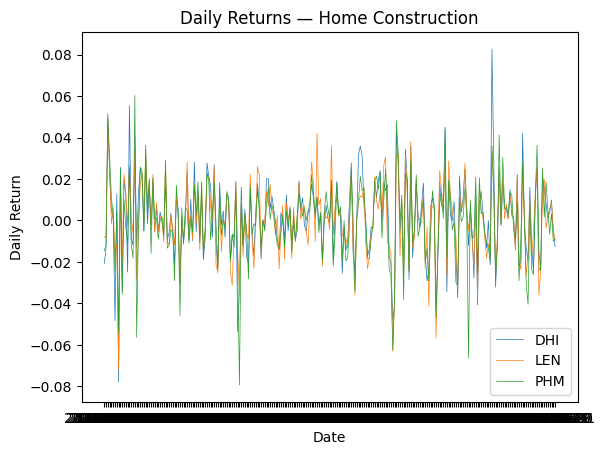

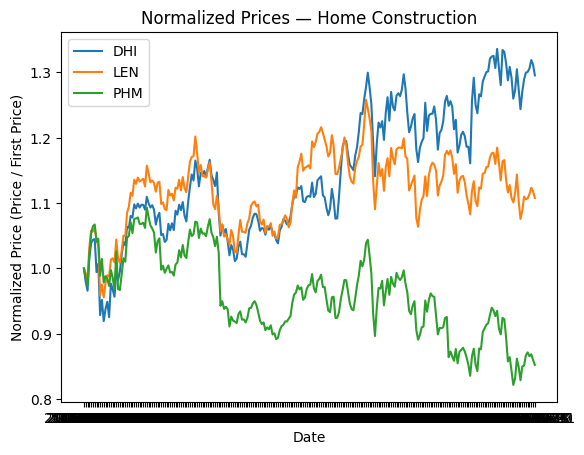

Cluster name: Investment Management, Stocks: BEN, TROW


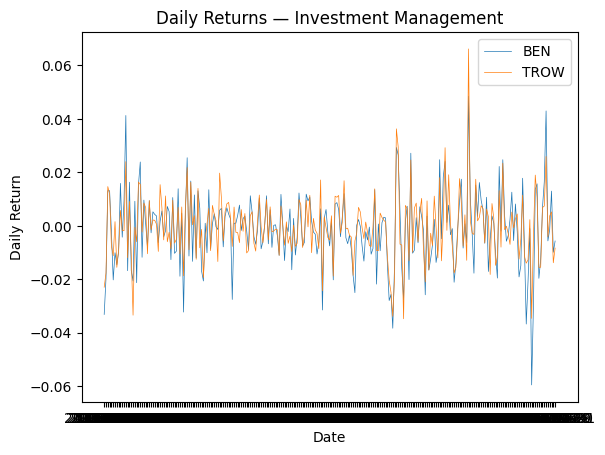

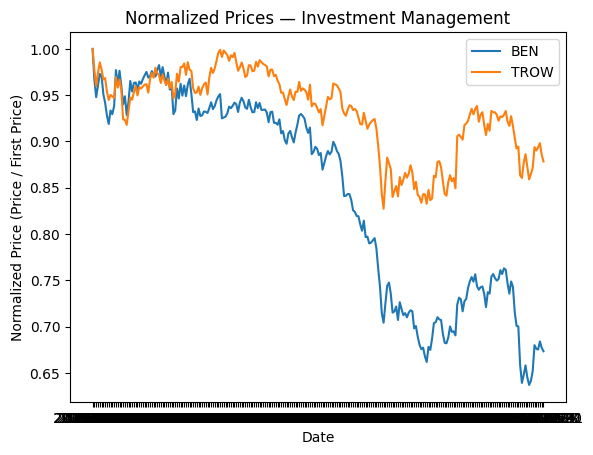

In [ ]:
#Define clusters
clusters = {
    "Home Construction": ["DHI", "LEN", "PHM"],
    "Investment Management": ["BEN", "TROW"]
}

#Plotting function
def plot_cluster(prices, cluster_name, tickers):
    # Check which tickers are available in the dataset
    available = [t for t in tickers if t in prices.columns]
    normalized = price_data / price_data.iloc[0]

    #daily returns
    for t in available:
        plt.plot(ret.index, ret[t], label=t, linewidth = 0.5)
    plt.title(f"Daily Returns — {cluster_name}")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    plt.show()

    #normalised prices
    for t in available:
        plt.plot(normalized.index, normalized[t], label=t, linewidth = 1.5)
    plt.title(f"Normalized Prices — {cluster_name}")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (Price / First Price)")
    plt.legend()
    plt.show()

for name, members in clusters.items():
    print(f"Cluster name: {name}, Stocks: {', '.join(members)}")
    plot_cluster(price_data, name, members)

##### Analysis of the plots

**Home construction  DHI, LEN, PHM**

The peaks and trough of the daily returns of the stocks are aligned. Whenever one stock has a positive/negative return, the others almost always move in the same direction, indicating a high correlation. Also, while DHI is overall the better performer, the moving trends are parallel and followed a nearly identical upward path. Both daily returns and normalised prices plots have proved that these three companies have the same reactions to the news and market forces instead of company-specific events. 

**Investment management BEN, TROW**

The daily returns of the two stocks in this cluster are also almost perfectly synchronised, meaning that both companies were subjected to the same industry-specific risks and opportunities. Both stocks followed a nearly identical downward trend, and the two lines are really close together most of them time. The strong similarity in the downward path indicates that both companies were affected by the same negative pressures on the investment industry.

Overall, the plots of both clusters have shown that the companies in each clusters do perform similarly, which again proved that the clutering was accurate.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build a label per name + an ordering
labels = {}
for cid, (_, members) in enumerate(sorted(all_clusters.items(), key=lambda kv: (-len(kv[1]), kv[0]))):
    for n in sorted(members):
        labels[n] = cid

order = sorted(labels, key=lambda n: (labels[n], n))
corr_reordered = ret_corr.loc[order, order]

plt.figure(figsize=(10,8))
sns.heatmap(corr_reordered, vmin=-1, vmax=1, cmap="vlag", center=0, square=True)
plt.title("Correlation heatmap ordered by clusters")
plt.tight_layout()


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# build label vector aligned to corr.index
y = np.array([labels[n] for n in ret_corr.index])
sil = silhouette_score(D, y, metric="precomputed")
print("Silhouette (precomputed distances):", sil)


Silhouette (precomputed distances): 0.030804728399034368


## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

You may use generative AI such as chatGPT to help with this part of the assignment (but not the other parts).

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

## Dependencies and Files
- pandas, numpy, sk-learn, pandas_datareader, scipy, matplotlib, seaborn
- SP500 historical membership data (csv file)
- 20100101 - 20120101 SP500 members' daily closing price data (based on members at 20110101, also a csv file)

# Data: Getting Survivorship Free S&P500 Equity Data
In any quantitative research involving simulation, a lot can go wrong if we do not use survivorship bias free data. For instance, if we want to test our clustering algorithm on stocks in cluded in the S&P500 for different time periods, then it is important to have access to the membership data for S&P500 for that date. This is in general very difficult to obtain.

We could rely on WRDS, which is a subscription based data vendor used by many academics. 

An easier way to get is to download the historical components [file from this link](https://github.com/fja05680/sp500).

## Get daily close based on historical components of SP 500

Given we have historical membership data of S&P 500, we will use this to generate survivorship data of members of the S&P 500 for our clustering algorithm

In [ ]:
import pandas as pd

# Import data
path = r"..\S&P 500 Historical Components & Changes(07-12-2025).csv" # get historical compnents data from 1996 to 20250712

membership_data = pd.read_csv(path)

membership_data["date"] = pd.to_datetime(membership_data["date"], format = "%Y-%m-%d")
membership_data = membership_data.set_index("date")
membership_data.head()

tickers
date                                                         
1996-01-02  AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD...
1996-01-03  AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD...
1996-01-04  AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD...
1996-01-10  AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD...
1996-01-11  AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD...

In [ ]:
# Define function to get members on specific date
def members_on(membership_data : pd.DataFrame, date:str):
    ts = pd.Timestamp(date)
    pos = membership_data.index.get_indexer([ts], method="nearest")[0]
    row = membership_data.iloc[pos].values[0]
    tickers = row.split(",")
    return tickers

# test
tickers = members_on(membership_data=membership_data, date = "2000-01-01")
tickers[0:10]

['AABA', 'AAMRQ', 'AAPL', 'ABI', 'ABS', 'ABT', 'ABX', 'ACKH', 'ACV', 'ADBE']

In [ ]:
# get data from pandas datareader
import pandas_datareader.data as web
from datetime import date
from tqdm import tqdm

# utlity
def get_traintest_data(base_date, start, end, membership_data):
    tickers = members_on(membership_data, base_date) # members of SP500 on base_date

    # stooq: often works with raw US tickers
    px = {}
    for t in tqdm(tickers, desc = f"Processing ticker {t}"):
        try:
            df = web.DataReader(t, 'stooq', start=start, end=end)  # OHLCV, daily
            if not df.empty:
                px[t] = df.sort_index() 
        except Exception:
            pass

    prices = pd.concat({k:v['Close'] for k,v in px.items()}, axis=1) # wide panel of closes
    return prices

# from 2010 to 2012 (20110101 is the base date)
prices = get_traintest_data(base_date = "2011-01-01", start = "2010-01-01", end = "2012-01-01", membership_data=membership_data)

## Clean Data
We deal with:
- missing values: fill with rolling mean or forward fill
- outliers of returns (since clustering algos based on distance are sensitive to outliers): winsorize top and bottom 1\%. We will perform winsorization next section.

In [ ]:
# check # of NAs
prices.isna().sum().sum()

np.int64(602)

In [ ]:
# view tickers that have more than 10 NAs
prices.isna().sum()[(prices.isna().sum() > 10).values]

EA    497
dtype: int64

In [ ]:
# Drop EA
prices = prices.drop(columns=["EA"])

In [ ]:
# forwardfill rest of nulls
prices = prices.ffill()
prices.isna().sum().sum()

np.int64(0)

In [ ]:
# Save price data
base_date =  "20110101" # We assume we want to use clustering on this date. We use past 1 year data to form clusters. We use future 1 year data to test this cluster
prices.to_csv(f"SP500_prices_{base_date}.csv")

In [ ]:
# convert to return
ret = prices.pct_change().dropna()

# use past 1 year for training / future 1 year for OOS testing 
ret_train = ret.loc[:pd.to_datetime(base_date)]
ret_test = ret.loc[pd.to_datetime(base_date):]

ret_train.head()

A      AAPL       ABT      ADBE       ADI       ADM  \
Date                                                                     
2010-01-05 -0.010781  0.001714 -0.007909  0.016446 -0.001623  0.005343   
2010-01-06 -0.003669 -0.015962  0.005316 -0.002122 -0.001874 -0.002552   
2010-01-07 -0.001287 -0.001767  0.008315 -0.019405 -0.007921 -0.010450   
2010-01-08 -0.000300  0.006730  0.005049 -0.005422  0.005883 -0.012412   
2010-01-11  0.000600 -0.008880  0.005218 -0.013083 -0.005848  0.000531   

                 ADP      ADSK       AEE       AEP  ...        WY      WYNN  \
Date                                                ...                       
2010-01-05 -0.005420 -0.015193 -0.004022 -0.011495  ...  0.021304  0.060890   
2010-01-06 -0.002204  0.002373 -0.006930  0.010171  ... -0.011017 -0.013221   
2010-01-07 -0.000455  0.005525 -0.009387  0.008622  ... -0.004611  0.021433   
2010-01-08 -0.001435  0.030612 -0.006881  0.011939  ... -0.009152 -0.007201   
2010-01-11  0.004419 -0.000381  0.008095  0.010332  ...  0.006544 -0.003214   

                   X       XEL       XOM      XRAY       XRX       YUM  \
Date                                                                     
2010-01-05 -0.001420 -0.011448  0.003978 -0.011828  0.001155 -0.003575   
2010-01-06  0.044490  0.001537  0.008622  0.006633 -0.009295 -0.007071   
2010-01-07  0.008392 -0.004136 -0.003149  0.013051  0.004670 -0.000196   
2010-01-08  0.072738  0.000642 -0.004029  0.000000 -0.003446  0.000196   
2010-01-11 -0.036874  0.009778  0.011240  0.012975  0.024453  0.017414   

                 ZBH      ZION  
Date                            
2010-01-05  0.031616  0.035170  
2010-01-06 -0.000317  0.087121  
2010-01-07  0.023045  0.112157  
2010-01-08 -0.021079 -0.016257  
2010-01-11  0.022113  0.006060  

[5 rows x 339 columns]

# Applications of Clustering in Finance

- Classification / EDA
- Trading
- Portfolio Selection & Risk Analysis

We will focus on the first two applications in this notebook.


## Type of Features used
Clustering algorithms can form optimal clusters that are highly dependent on the features used. 

Some standard examples of features used can be:
- $\tau$-rolling window period returns
- Correlation
    - A $\tau$-period correlation can produce very similar results to using up to $\tau$-period lagged returns as features. 
    - Note we can transform raw correlation to reprsent pairwise *distances* between points via:
    $$
    d_{ij} = 1 - |\rho_{ij}|
    $$
    - A canoncial transformation of correlation in finance is the *Mantegna distance*, which is computed by the following formula:
    $$
    d_{ij} = \sqrt{2(1-\rho_{ij})}
    $$
    - Note for the first option we value the *magnitude* of the correlation. For the Mantegna distance correlation of 1 represents minimum distance while correlation of -1 represents maximum direction.
- Statistical moments: mean, standard deviation, skew, and kurtosis
- Technical & Market Data: RSI, RS, MACD, Momentum (e.g., 12 - 1), scaled market cap, short-interest ratio, scaled dollar volume traded, and etc. 
- Fundamental Data: PE ratio, PB ratio, ROE, turnover, leverage ratio, dividend yield, etc.
- Factor exposures: Rolling exposures to certain factors (either fundamental or statistical) can be used
- Other: residual correlation, partial correlation, spearman (rank) correlation, industry/sector representation (encoded to a vector), normalized prices, etc.

## Classification / Basic EDA
In this section, we will use basic features to try to form clusters and see if they make sense.

### k-means Clustering
K-means is a distance based clustering algorithm that initializes k centroids and iteratively finds the most optimal spheres that separate the data based on the feature set.


First, let us try using past annualized return and volatility to form clusters via k-means. We use only two features per sample for visualization purpose.

Later, we will expand our feature set to find more realistic clusters

In [ ]:
import pandas as pd
# Get data 
prices = pd.read_csv("SP500_prices_20110101.csv", index_col=0)

# Conver to datetime obj
prices.index = pd.to_datetime(prices.index)

# convert to return
ret = prices.pct_change().dropna()

# use past 1 year for training / future 1 year for OOS testing 
base_date = "2011-01-01"
ret_train = ret.loc[:pd.to_datetime(base_date)]
ret_test = ret.loc[pd.to_datetime(base_date):]

ret_train.head()

A      AAPL       ABT      ADBE       ADI       ADM  \
Date                                                                     
2010-01-05 -0.010781  0.001714 -0.007909  0.016446 -0.001623  0.005343   
2010-01-06 -0.003669 -0.015962  0.005316 -0.002122 -0.001874 -0.002552   
2010-01-07 -0.001287 -0.001767  0.008315 -0.019405 -0.007921 -0.010450   
2010-01-08 -0.000300  0.006730  0.005049 -0.005422  0.005883 -0.012412   
2010-01-11  0.000600 -0.008880  0.005218 -0.013083 -0.005848  0.000531   

                 ADP      ADSK       AEE       AEP  ...        WY      WYNN  \
Date                                                ...                       
2010-01-05 -0.005420 -0.015193 -0.004022 -0.011495  ...  0.021304  0.060890   
2010-01-06 -0.002204  0.002373 -0.006930  0.010171  ... -0.011017 -0.013221   
2010-01-07 -0.000455  0.005525 -0.009387  0.008622  ... -0.004611  0.021433   
2010-01-08 -0.001435  0.030612 -0.006881  0.011939  ... -0.009152 -0.007201   
2010-01-11  0.004419 -0.000381  0.008095  0.010332  ...  0.006544 -0.003214   

                   X       XEL       XOM      XRAY       XRX       YUM  \
Date                                                                     
2010-01-05 -0.001420 -0.011448  0.003978 -0.011828  0.001155 -0.003575   
2010-01-06  0.044490  0.001537  0.008622  0.006633 -0.009295 -0.007071   
2010-01-07  0.008392 -0.004136 -0.003149  0.013051  0.004670 -0.000196   
2010-01-08  0.072738  0.000642 -0.004029  0.000000 -0.003446  0.000196   
2010-01-11 -0.036874  0.009778  0.011240  0.012975  0.024453  0.017414   

                 ZBH      ZION  
Date                            
2010-01-05  0.031616  0.035170  
2010-01-06 -0.000317  0.087121  
2010-01-07  0.023045  0.112157  
2010-01-08 -0.021079 -0.016257  
2010-01-11  0.022113  0.006060  

[5 rows x 339 columns]

In [ ]:
from warnings import filterwarnings # to ignore warnings
filterwarnings('ignore')

  File "c:\Users\jayju\miniconda3\envs\quant\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Text(0.5, 1.0, 'Elbow (inertia)')

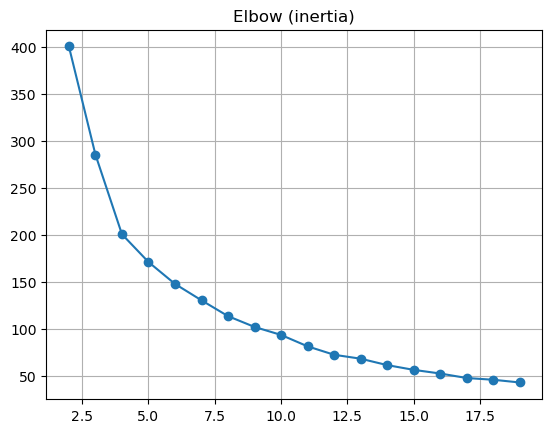

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# use annualized mean and vol as features
ann_ret = ret_train.mean()*252
ann_vol = ret_train.std()*np.sqrt(252)

feat_train = pd.DataFrame({'Returns': ann_ret, 'Volatility': ann_vol}).dropna()
X_train = feat_train.values

# scale 
Z_train = StandardScaler().fit_transform(X_train)

# Use elbow method on inertia (WCSS) ---
inertias = []
ks = range(2, 20)
for k in ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(Z_train)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker='o')
plt.grid(True)
plt.title('Elbow (inertia)')


##### Remarks
- The elbow method is used to choose the number of centroids we will use to implement our algorithm.

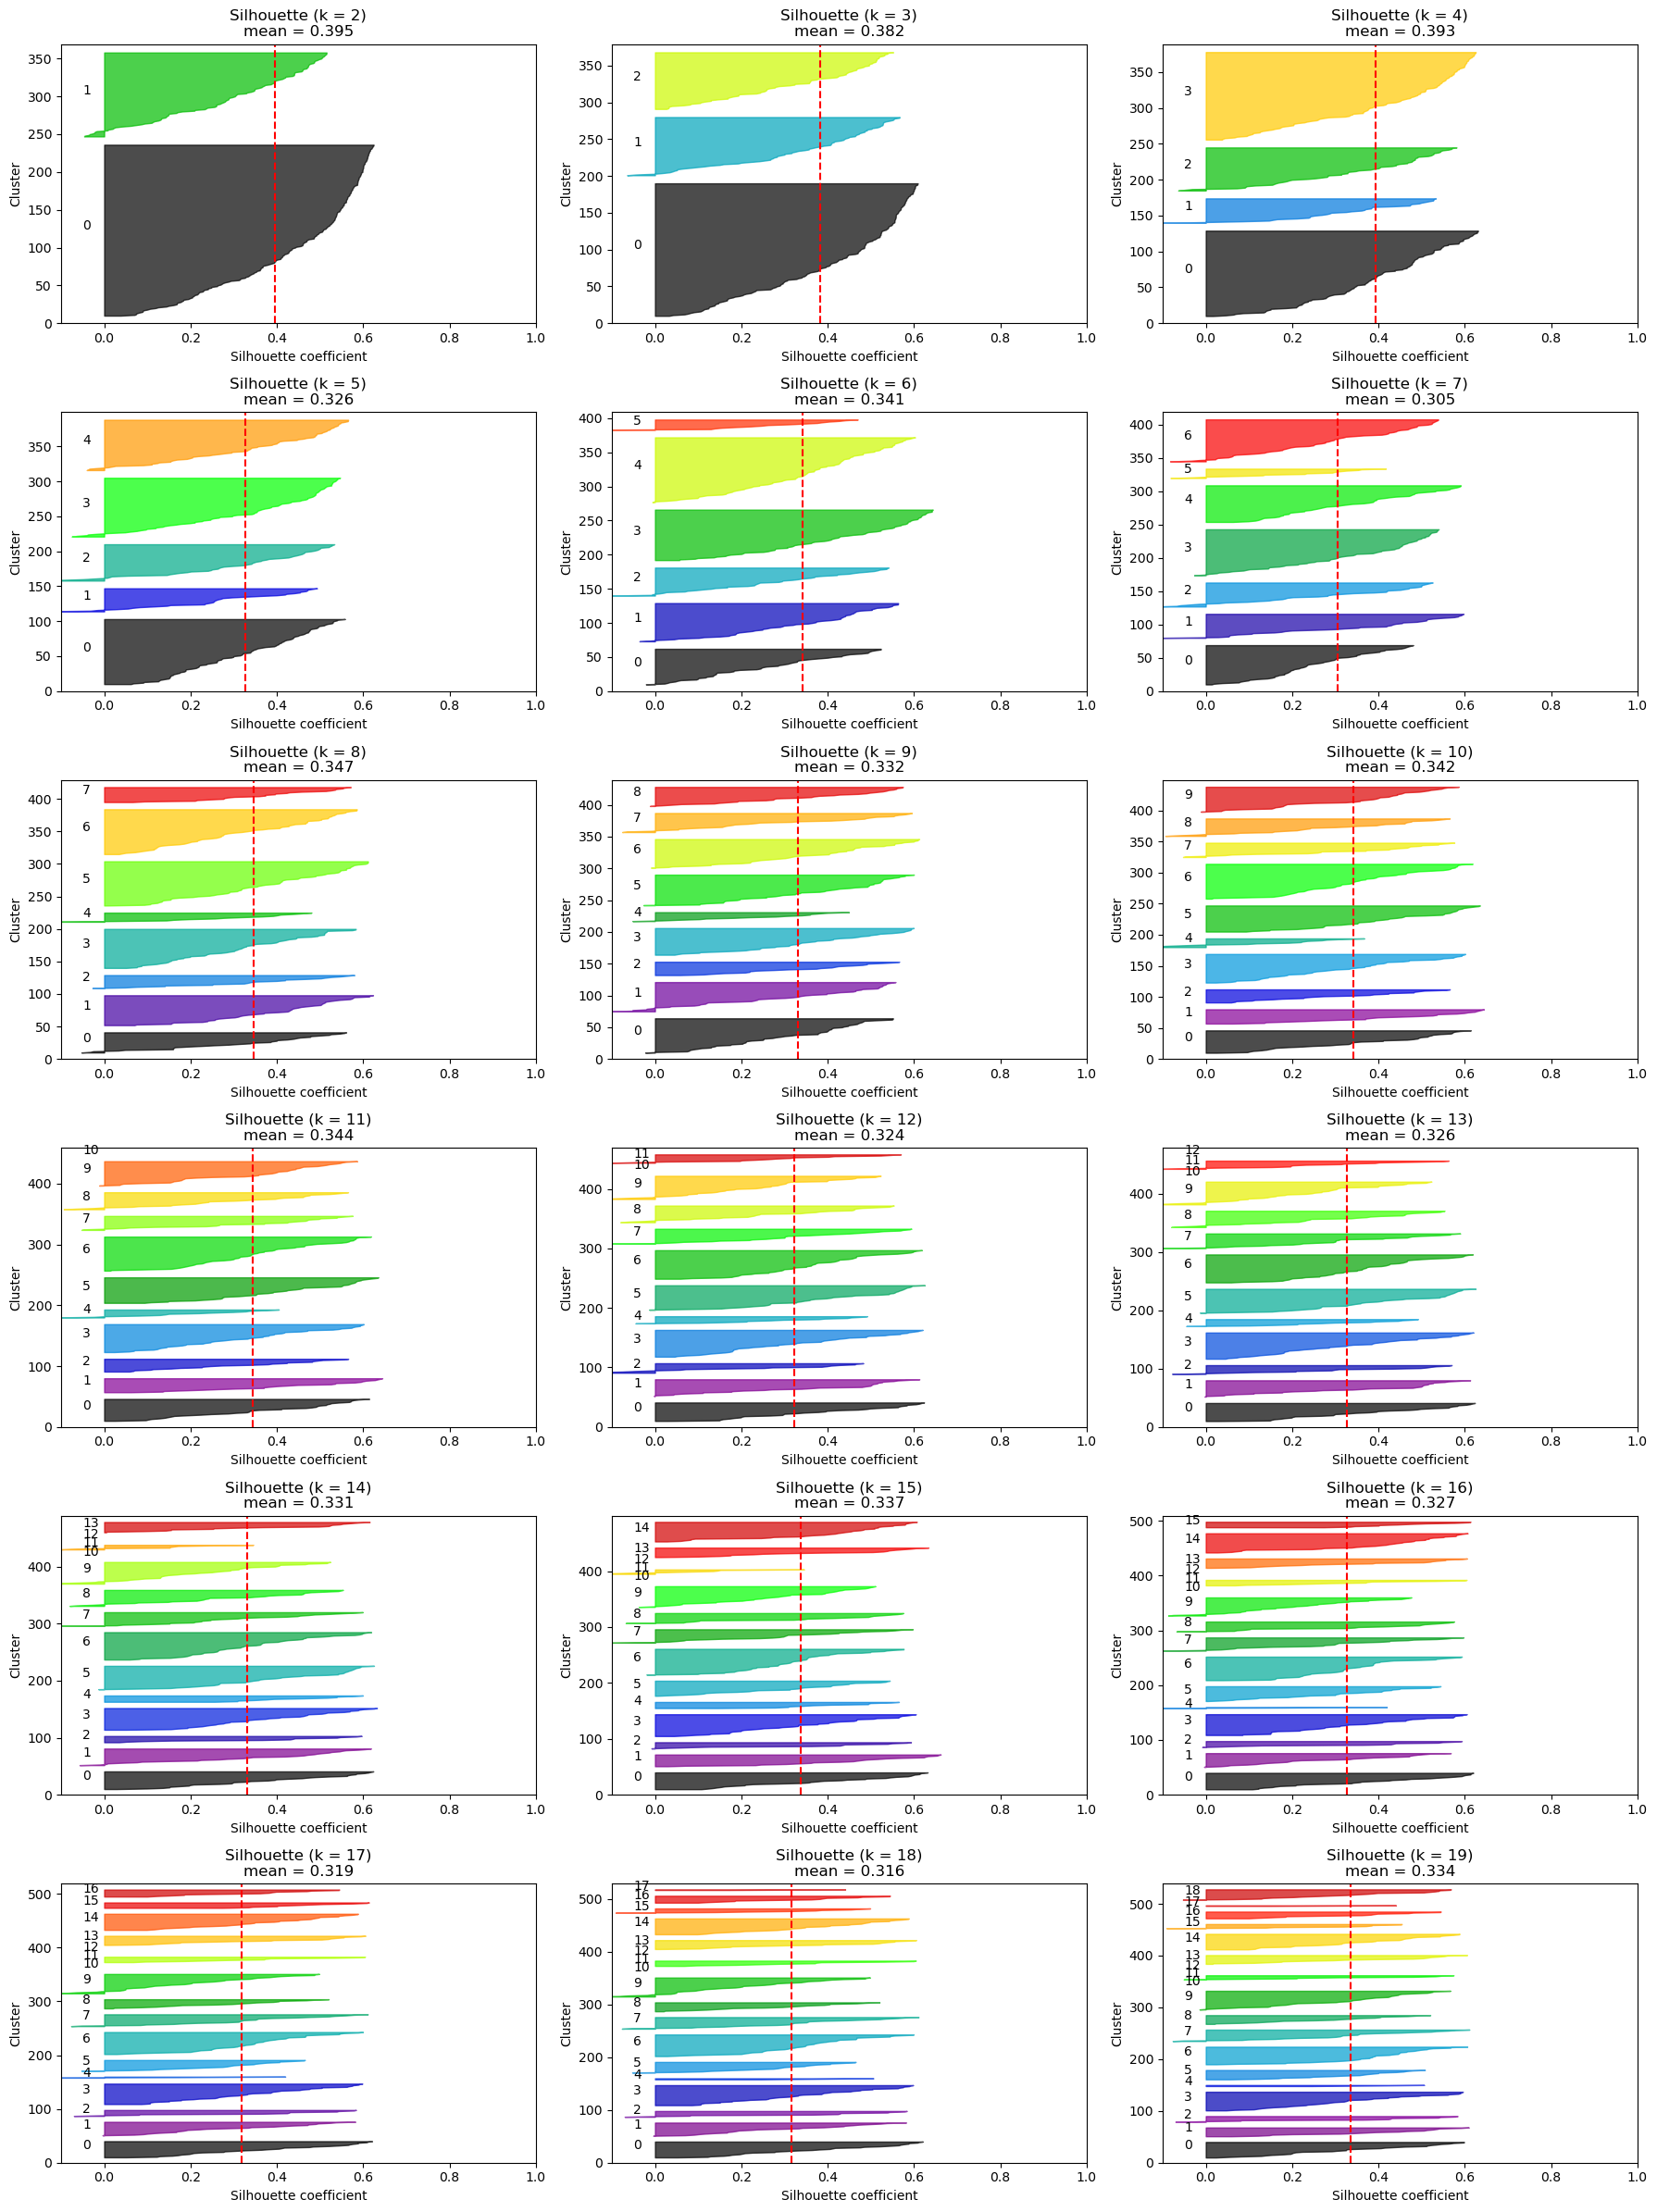

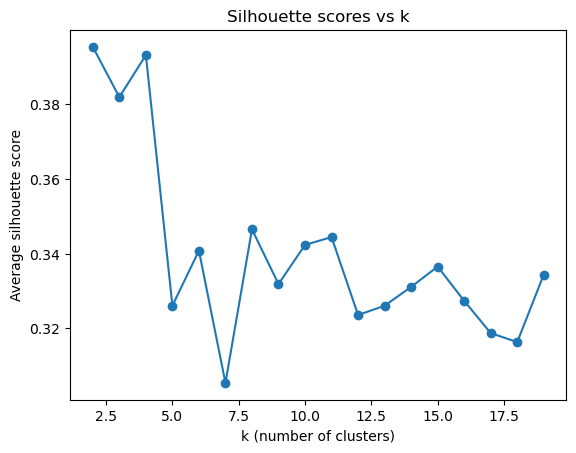

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def silhouette_plot(X, k_list, n_cols=2, figsize_per_plot=(6, 4)):
    """
    Plot silhouette plots for a list of k values in a subplot grid.

    Parameters:
        X : 2d array-like, shape (n_samples, n_features)
        k_list : list of integers, the k's to evaluate (must be ≥ 2)
        n_cols : number of columns in subplot grid
        figsize_per_plot : tuple, (width, height) for each subplot
    """
    n_plots = len(k_list)
    n_rows = (n_plots + n_cols - 1) // n_cols  # ceiling division

    # Figure size: each subplot gets figsize_per_plot
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(figsize_per_plot[0] * n_cols,
                                      figsize_per_plot[1] * n_rows),
                             squeeze=False)

    # Flatten axes for easier iteration
    axes_flat = axes.flatten()

    sil_means = {}

    for idx, k in enumerate(k_list):
        ax = axes_flat[idx]
        # Fit and label
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = kmeans.fit_predict(X)

        # Compute average silhouette
        sil_avg = silhouette_score(X, labels)
        sil_means[k] = sil_avg

        # Compute sample silhouette values
        sil_vals = silhouette_samples(X, labels)

        # Plot silhouette for each cluster
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (k + 1) * 10])

        y_lower = 10
        for cluster in range(k):
            cluster_vals = sil_vals[labels == cluster]
            cluster_vals.sort()
            size = cluster_vals.shape[0]
            y_upper = y_lower + size

            color = cm.nipy_spectral(cluster / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, cluster_vals,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size, str(cluster))
            y_lower = y_upper + 10

        ax.axvline(x=sil_avg, color="red", linestyle="--")
        ax.set_title(f"Silhouette (k = {k})\nmean = {sil_avg:.3f}")
        ax.set_xlabel("Silhouette coefficient")
        ax.set_ylabel("Cluster")

    # Hide unused subplots (if any)
    for j in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes_flat[j])

    fig.tight_layout()
    plt.show()

    # Optionally return the mean silhouette dict
    return sil_means

# Example
k_list = list(range(2, 20))
sil_means = silhouette_plot(Z_train, k_list, n_cols=3)

sil_means
# Example: test for different k
sil_scores = []

for cluster, mean_score in sil_means.items():
    sil_scores.append(mean_score)


# plot average sil score over k
plt.plot(k_list, sil_scores, marker='o')
plt.xlabel("k (number of clusters)")
plt.ylabel("Average silhouette score")
plt.title("Silhouette scores vs k")
plt.show()


##### Remarks
- Along with the elbow method, we also refer to silhouette scores for different number of clusters (2 to 20). 
- We generally want high silhouette scores
- In the end, we chose four clusters based on the elbow method and silhouette score.

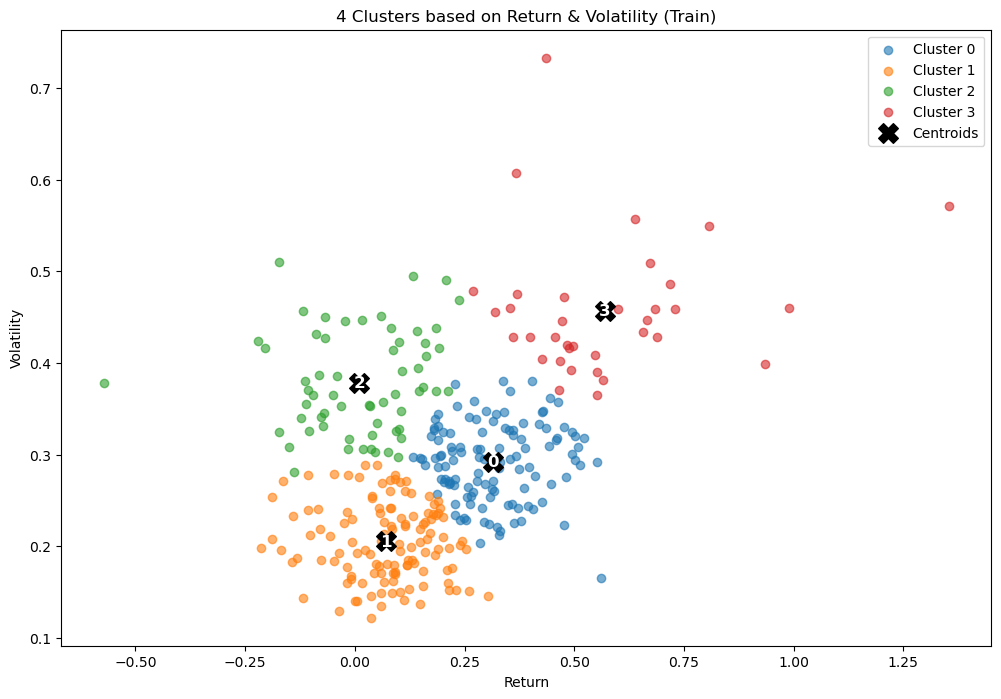

In [ ]:
# pick K and fit final model 
K = 4
km = KMeans(n_clusters=K, init='k-means++', n_init=25, random_state=0)
labels = km.fit_predict(Z_train)

clusters_df = feat_train.assign(Cluster=labels).reset_index().rename(columns={'index':'Ticker'})

# Compute cluster centers in terms of Returns & Volatility
centers = (
    clusters_df.groupby("Cluster")[["Returns", "Volatility"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 8))

# plot each cluster separately
for clust in sorted(clusters_df["Cluster"].unique()):
    sub = clusters_df[clusters_df["Cluster"] == clust]
    plt.scatter(sub["Returns"], sub["Volatility"], label=f"Cluster {clust}", alpha=0.6)

# plot centroids
plt.scatter(centers["Returns"], centers["Volatility"],
            marker='X', s=200, c='black', label="Centroids")

# label centroid coordinates
for _, row in centers.iterrows():
    plt.text(row["Returns"], row["Volatility"],
             f"{int(row['Cluster'])}",
             fontsize=12, fontweight='bold',
             ha='center', va='center', color='white')

plt.title("4 Clusters based on Return & Volatility (Train)")
plt.xlabel("Return")
plt.ylabel("Volatility")
plt.legend()
plt.show()


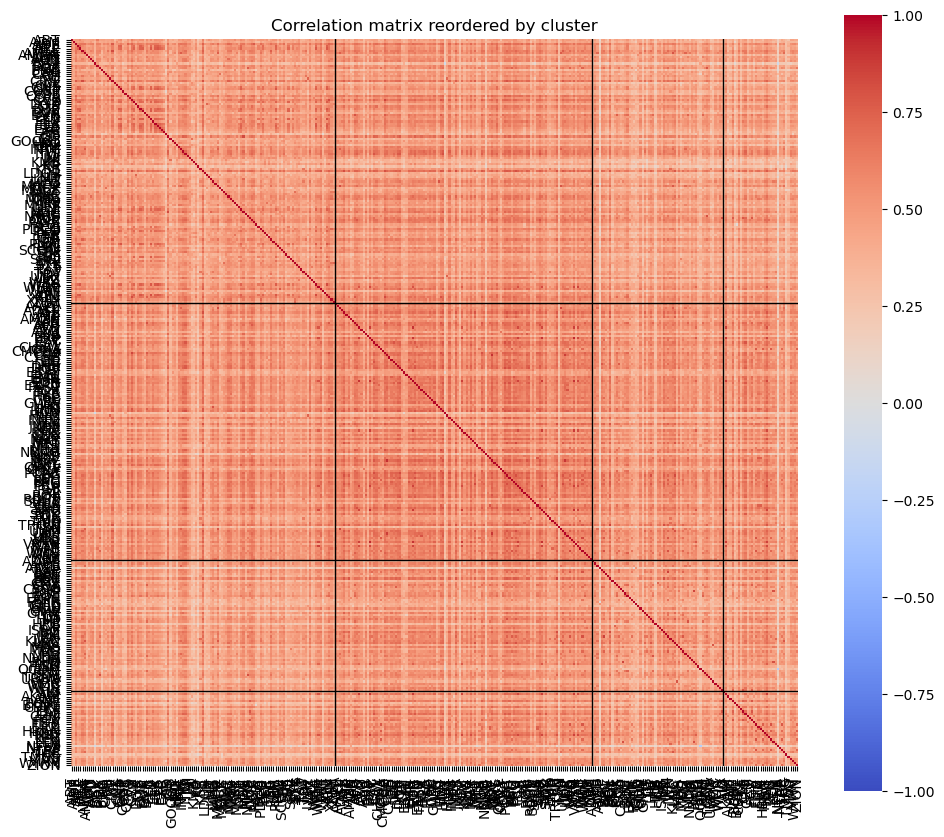

In [ ]:
import seaborn as sns

# Get heatmap of reindex correlation
corr_train = ret_train.corr()

def plot_corr_by_cluster(corr_df, clusters_df, cluster_col="Cluster"):
    # Determine ordering
    cluster_order = (
        clusters_df.groupby(cluster_col)
        .size()
        .sort_values(ascending=False)
        .index
    )
    ticker_order = []
    for cl in cluster_order:
        tlist = clusters_df.loc[clusters_df[cluster_col] == cl, "Ticker"].tolist()
        ticker_order.extend(sorted(tlist))
    
    # Reindex
    corr_reord = corr_df.loc[ticker_order, ticker_order]
    
    # Plot
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(
        corr_reord,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        center=0,
        xticklabels=True,
        yticklabels=True,
        square=True,
        cbar_kws={"shrink": 0.8},
    )

    #Draw cluster separators
    import numpy as np
    cluster_sizes = [ (clusters_df["Cluster"] == cl).sum() for cl in cluster_order ]
    cum = np.cumsum(cluster_sizes)
    for pos in cum[:-1]:
        ax.axhline(pos, color='black', linewidth=1)
        ax.axvline(pos, color='black', linewidth=1)

    plt.title("Correlation matrix reordered by cluster")
    plt.tight_layout()
    plt.show()

# Call it
plot_corr_by_cluster(corr_train, clusters_df)


##### Remarks
- Not surprisingly, our clusters formed from simple ret, vol pair does not seem to do a good job forming clusters, as seen from the re-indexed correlation heatmap. If they were good clusters, then we should see a darker region along the diagonal versus the off diagonals.

#### Evaluating Clusters Formed

One of the main ways we would verify that the clusters are actually robust is to track the clusters over time. We will keep track of the ARI (Adjusted Rand Index) to do this.

In [ ]:
# Get feature history data by using a rolling window. THis will be later used as input for testing robustness

def compute_feature_history(returns_df, lookback_return=252, lookback_vol=252, formation_dates=None):
    """
    Parameters:
        returns_df: 
            DataFrame, index = trading dates, columns = assets, values = simple returns (e.g. daily pct-change)
        
        formation_dates: 
            optional list of dates at which to compute features;
            if None, uses all dates from max(lookback) onward
    Returns:
        feature_hist: dict mapping formation_date -> DataFrame (assets × features)
    """
    # Step 1: make sure returns aligned, no missing leading zeros
    # Step 2: Optionally forward-fill / drop NaNs in returns
    # Step 3: For each formation date t, compute features using past returns up to t-1
    
    # define the candidate formation dates
    if formation_dates is None:
        formation_dates = returns_df.index[max(lookback_return, lookback_vol):]
    feature_hist = {}
    
    for t in formation_dates:
        # define the lookback window 
        idx = returns_df.index.get_loc(t)
        if idx < max(lookback_return, lookback_vol):
            continue  # not enough history
        window_returns = returns_df.iloc[idx - lookback_vol : idx]  # vol window
        window_ret_for_ret = returns_df.iloc[idx - lookback_return : idx]  # return window
        
        # compute per-asset return feature 
        mean_ret = window_ret_for_ret.mean(axis = 0) * 252
        
        # compute per-asset volatility
        vol = window_returns.std(axis=0) * np.sqrt(252) 
        
        
        # combine into a DataFrame
        df_feat = pd.DataFrame({
            'Return': mean_ret,
            'Volatility': vol,
        })
        # drop assets with NaN / insufficient data
        df_feat = df_feat.dropna(how='any')
        
        feature_hist[t] = df_feat
    
    return feature_hist


feature_hist = compute_feature_history(ret, lookback_return=252, lookback_vol=252)

# check one formation date
t0 = sorted(feature_hist.keys())[0]
print("At date", t0)
print(feature_hist[t0].head())



At date 2011-01-04 00:00:00
        Return  Volatility
A     0.338446    0.306989
AAPL  0.467684    0.267911
ABT  -0.119824    0.142895
ADBE -0.096067    0.380552
ADI   0.223725    0.293485


<Axes: >

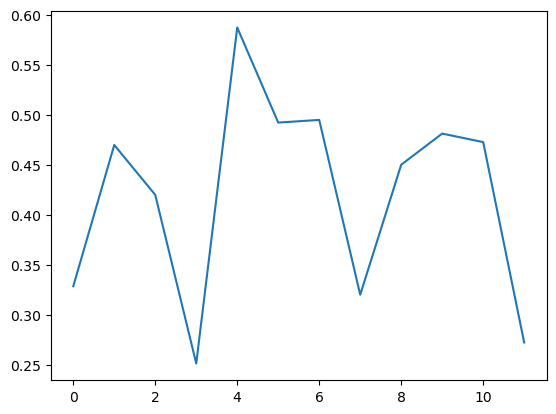

In [ ]:
# Use feature history dataframe to check for robustness across time

from sklearn.metrics import adjusted_rand_score

def cluster_labels(features_df, n_clusters):
    """
    Given feature DataFrame (assets x features), return clustering labels Series.
    """
    km = KMeans(n_clusters=n_clusters, n_init=25, random_state=42)
    lab = km.fit_predict(features_df.values)
    return pd.Series(lab, index=features_df.index)

def rolling_persistence(feature_hist, window, step, n_clusters):
    """
    Parameters:
        feature_hist: 
            dict mapping date → DataFrame of features (assets × features) at that date
        window: 
            number of periods (dates) in each window
        step: 
            how many periods to move forward each iteration
        Returns: 
            list of (t, ARI between window t and t+step)
    """
    dates = sorted(feature_hist.keys())
    results = []
    for i in range(0, len(dates) - window - step + 1, step):
        t0 = dates[i + window - 1]
        t1 = dates[i + window - 1 + step]
        X0 = feature_hist[t0]
        X1 = feature_hist[t1]

        # cluster them
        l0 = cluster_labels(X0, n_clusters)
        l1 = cluster_labels(X1, n_clusters)

        
        # align tickers
        common = l0.index.intersection(l1.index)
        ari = adjusted_rand_score(l0.loc[common], l1.loc[common])
        results.append({'t0': t0, 't1': t1, 'ARI': ari, 'n_common': len(common)})
    return pd.DataFrame(results)

# Example usage:
df = rolling_persistence(feature_hist, window=1, step=20, n_clusters=4)
df['ARI'].plot()


##### Remarks
- ARI is volatile across time, indicating that our current clustering method may not be robust to treat the clusters as "true" long term clusters.

### DBSCAN
K-means is a distance based clustering method that forms clusters based on Euclidean Distance. However, our data shape may not be convex. DBSCAN is a density-based clustering algorithm that basically looks for dense regions within our data to form clusters

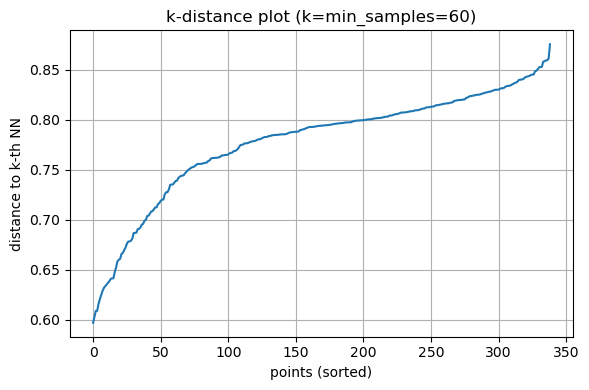

In [ ]:
from scipy.stats import mstats
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS


train_days = 30
base_date = pd.to_datetime(base_date)

# last 60 trading days strictly up to base_date (inclusive if present)
ret_train = ret.loc[:base_date].tail(train_days).copy()

def winsorize_df(df, lower=0.01, upper=0.99):
    """
    Winsorize each column independently across rows (time axis here).
    """
    q_low  = df.quantile(lower)
    q_high = df.quantile(upper)
    return df.clip(lower=q_low, upper=q_high, axis=1)

ret_train = winsorize_df(ret_train, 0.01, 0.99)  # 1%/99% clip


# Build 60-day feature matrix
feature_train = ret_train.T.copy()
feature_train.columns = [f"d_{i:02d}" for i in range(feature_train.shape[1])]

# L2-normalize each row for cosine distance (shape emphasis)
X = feature_train - feature_train.mean(axis=0)
X = normalize(X, norm='l2', axis=1)

# DBSCAN: choose eps via k-distance elbow 
def k_distances(X, k=10, metric='cosine'):
    """
    Return sorted distances to the k-th nearest neighbor (per point).
    For DBSCAN: choose min_samples=k, then inspect the elbow of this curve.
    """
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(X)
    distances, _ = nbrs.kneighbors(X)
    kth = distances[:, -1]  # distance to k-th neighbor
    return np.sort(kth)

# heuristic for min_samples (D = 60)
D = X.shape[1]
min_samples = max(5, min(2*D, feature_train.shape[0]//3))  # start point; adjust as needed

# plot k-distance curve to eyeball ε
kdist = k_distances(X, k=min_samples, metric='cosine')
plt.figure(figsize=(6,4))
plt.plot(kdist)
plt.title(f'k-distance plot (k=min_samples={min_samples})')
plt.xlabel('points (sorted)'); plt.ylabel('distance to k-th NN'); plt.grid(True)
plt.tight_layout()
plt.show()

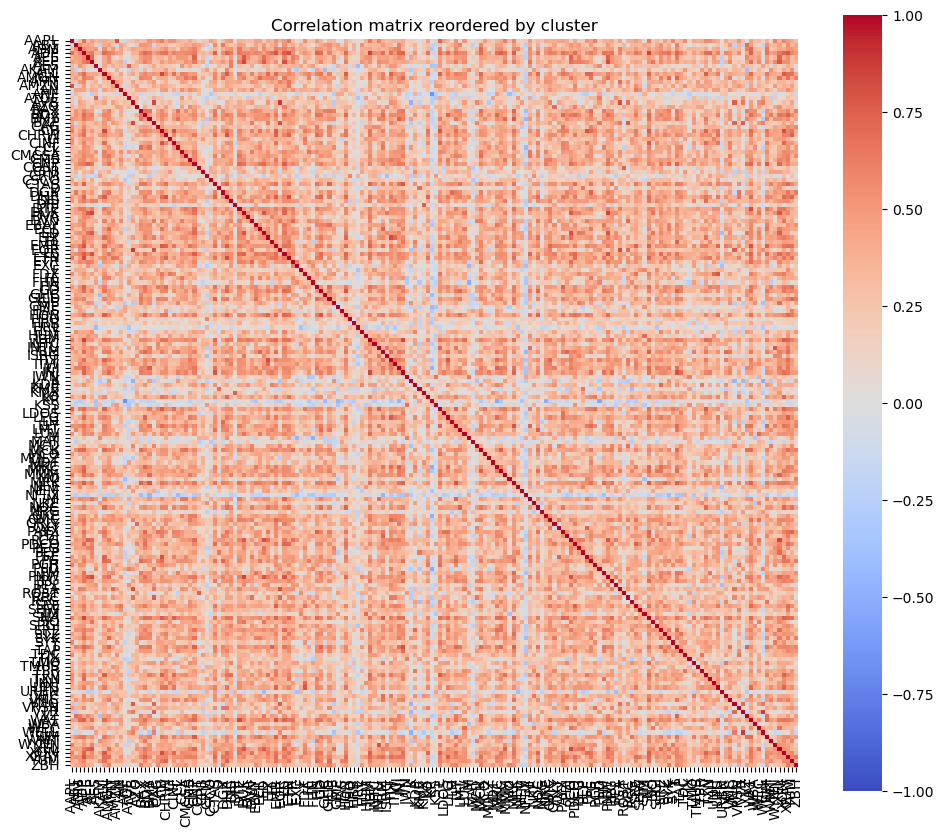

In [ ]:
# pick eps based on elbow method
eps = 0.7

# Fit DBSCAN (cosine distance)
dbs = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine', n_jobs=-1)
labels_db = pd.Series(dbs.fit_predict(X), index=feature_train.index, name='Cluster')

# Reordered correlation heatmap by cluster 
corr_train = ret_train.corr()  

def plot_corr_by_cluster(corr_df, clusters_df, cluster_col="Cluster"):
    # Determine ordering
    cluster_order = (
        clusters_df.groupby(cluster_col)
        .size()
        .sort_values(ascending=False)
        .index
    )
    ticker_order = []
    for cl in cluster_order:
        tlist = clusters_df.loc[clusters_df[cluster_col] == cl, "Ticker"].tolist()
        ticker_order.extend(sorted(tlist))
    
    # Reindex
    corr_reord = corr_df.loc[ticker_order, ticker_order]
    
    # Plot
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(
        corr_reord,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        center=0,
        xticklabels=True,
        yticklabels=True,
        square=True,
        cbar_kws={"shrink": 0.8},
    )

    # Draw cluster separators
    cluster_sizes = [ (clusters_df["Cluster"] == cl).sum() for cl in cluster_order ]
    cum = np.cumsum(cluster_sizes)
    for pos in cum[:-1]:
        ax.axhline(pos, color='black', linewidth=1)
        ax.axvline(pos, color='black', linewidth=1)

    plt.title("Correlation matrix reordered by cluster")
    plt.tight_layout()
    plt.show()

# plot
clusters_df = pd.DataFrame({'Ticker': labels_db.index, 'Cluster': labels_db.values})

# Example excluding noise from the heatmap:
plot_corr_by_cluster(corr_train, clusters_df[clusters_df.Cluster!=-1])

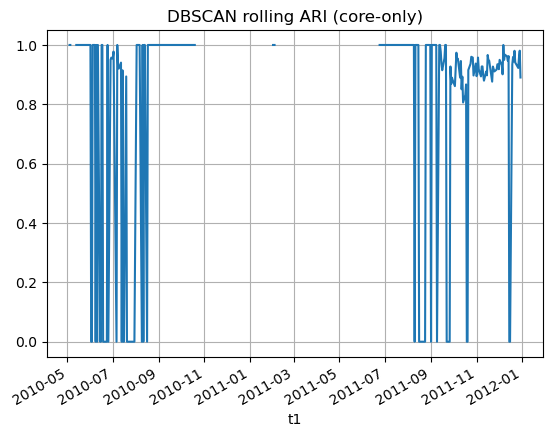

In [ ]:
# Build clusters_df and draw (you may exclude noise = -1 if you prefer)
clusters_df = pd.DataFrame({'Ticker': labels_db.index, 'Cluster': labels_db.values})

# Rolling robustness for DBSCAN via ARI
# Build rolling feature history of 30-day vectors
def compute_feature_history_vec(returns_df, lookback_days=30, formation_dates=None,
                                winsor=(0.01,0.99), l2norm=True):
    if formation_dates is None:
        formation_dates = returns_df.index[lookback_days:]
    feat_hist = {}
    for t in formation_dates:
        idx = returns_df.index.get_loc(t)
        W = returns_df.iloc[idx-lookback_days:idx]  # strictly past window
        if W.shape[0] < lookback_days: 
            continue
        W = winsorize_df(W, winsor[0], winsor[1])
        F = W.T.dropna(how='any')
        F = F - F.mean()
        if l2norm:
            F = pd.DataFrame(normalize(F.values, norm = 'l2', axis=1), index=F.index, columns=F.columns)
        feat_hist[t] = F
    return feat_hist

feature_hist = compute_feature_history_vec(ret, lookback_days=30)

# Use 90th quantile for epsilon
def eps_from_kdist(X, min_samples, metric='cosine', q=0.90):
    kd = k_distances(X, k=min_samples, metric=metric)
    return float(np.quantile(kd, q))

# fit dbscan on 30 demeaned + l2-normalized lagged daily returns
def dbscan_labels_from_features(F, min_samples, eps=None, metric='cosine', eps_quantile=0.90):
    X = F.values
    if eps is None:
        eps = eps_from_kdist(X, min_samples, metric=metric, q=eps_quantile)
    lab = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X)
    return pd.Series(lab, index=F.index)

def rolling_persistence_dbscan(feature_hist, min_samples, step=20, use_fixed_eps=True,
                               eps_quantile=0.90, ignore_noise=False, metric='cosine'):
    """
    Compare labels at t and t+step using ARI.
    If use_fixed_eps=True, calibrate eps at first window and reuse. Otherwise, we re-calibrate each time.
    """
    dates = sorted(feature_hist.keys())
    out = []
    fixed_eps = None
    for i in range(0, len(dates)-step):
        t0, t1 = dates[i], dates[i+step]
        F0, F1 = feature_hist[t0], feature_hist[t1]
        X0, X1 = F0.values, F1.values

        if use_fixed_eps and fixed_eps is None:
            fixed_eps = eps_from_kdist(X0, min_samples, metric=metric, q=eps_quantile)
            fixed_eps = 0.6 # manually fix eps

        eps0 = fixed_eps if use_fixed_eps else eps_from_kdist(X0, min_samples, metric, eps_quantile)
        eps1 = fixed_eps if use_fixed_eps else eps_from_kdist(X1, min_samples, metric, eps_quantile)

        l0 = DBSCAN(eps=eps0, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X0)
        l1 = DBSCAN(eps=eps1, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X1)
        s0 = pd.Series(l0, index=F0.index)
        s1 = pd.Series(l1, index=F1.index)

        common = s0.index.intersection(s1.index)
        if ignore_noise:
            keep = (s0.loc[common] != -1) & (s1.loc[common] != -1)
            common = common[keep]
        ari = adjusted_rand_score(s0.loc[common], s1.loc[common]) if len(common)>1 else np.nan
        out.append({'t0': t0, 't1': t1, 'ARI': ari, 'n_common': int(len(common)),
                    'eps0': eps0, 'eps1': eps1})
    return pd.DataFrame(out)

# robustness curve for DBSCAN over step size of 20
rob_db = rolling_persistence_dbscan(feature_hist, min_samples=min_samples, step=20,
                                    use_fixed_eps=True, ignore_noise=True)
rob_db.set_index('t1')['ARI'].plot(title='DBSCAN rolling ARI (core-only)')
plt.grid(True)
plt.show()


##### Remarks
- The sudden drops in ARI in between steps reresent structural regime changes for our clusters.
- eps = 0.6 still too rigid for most periods as we are getting single core clusters for most windows. 

### OPTICS
In this section, we will use OPTICS, a density based clustering algorithm that was developed to address the problems arising from the DBSCAN algorithm. Specifically, DBSCAN uses a fixed distance metric $\epsilon$ to determine clusters, but in reality clusters may have different densities for a real dataset. But OPTICS does not return one partition for one $\epsilon$; it allows us to reveal mult-scale structure of the data.

The analysis follows closely the results presented in the paper written by [Rotondi and Russo (2024)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5080998). Please refer to the paper for a more complete background.

We will also use the following types of features this time:
- pairwise sum of squared distances (SSD) of normalized price series
- pairwise PCA distances (We use K = 5 principal components to project normalized returns (referred to scores), but choice of K is arbitrary)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from statsmodels.tsa.stattools import adfuller

# ------------------------------
# 1) cum_price_index
# ------------------------------
def cum_price_index(ret: pd.DataFrame, base: float = 100.0) -> pd.DataFrame:
    """Rebase each column to 'base' then cumulate (1+r)."""
    return (1.0 + ret).cumprod() * base

# ------------------------------
# 2) ssd_distance
# ------------------------------
def ssd_distance(ret: pd.DataFrame) -> pd.DataFrame:
    """
    SSD on normalized price indices:
      - Build cumulative price index per asset over the window
      - Z-score each column
      - Return pairwise squared Euclidean distances between columns
    """
    S = cum_price_index(ret, base=1.0)
    Z = (S - S.mean()) / S.std(ddof=1)  # T x N
    Zval = Z.values
    G = Zval.T @ Zval                    # Gram: N x N
    g = np.diag(G)
    d2 = g[:, None] + g[None, :] - 2.0 * G
    d2 = np.maximum(d2, 0.0)             # numeric cleanup
    D = pd.DataFrame(d2, index=Z.columns, columns=Z.columns)
    return D

# ------------------------------
# 3) pca_distance
# ------------------------------
def pca_distance(ret: pd.DataFrame, n_components: int = 5) -> pd.DataFrame:
    """
    PCA distance:
      - Center columns
      - Compute top-K components and scores
      - Reconstruct R_hat = scores @ components_ + mean
      - Z-score columns and return pairwise squared distances
    """
    R = ret.copy()
    mu = R.mean(axis=0)
    Rc = R - mu
    pca = PCA(n_components=n_components, svd_solver="full")
    scores = pca.fit_transform(R.values)        # = Rc @ components_.T
    V = pca.components_                         # K x N (rows are loading vectors)
    Rhat = scores @ V                           # centered reconstruction
    Rhat = pd.DataFrame(Rhat, index=R.index, columns=R.columns)
    Rhat = Rhat + mu                            # add back column means

    # Z-score and compute SSD between columns of Rhat
    Z = (Rhat - Rhat.mean()) / Rhat.std(ddof=1)
    Zval = Z.values
    G = Zval.T @ Zval
    g = np.diag(G)
    d2 = g[:, None] + g[None, :] - 2.0 * G
    d2 = np.maximum(d2, 0.0)
    D = pd.DataFrame(d2, index=Z.columns, columns=Z.columns)
    return D

# ------------------------------
# 4) OPTICS (precomputed)
# ------------------------------
def optics(D: pd.DataFrame, xi: float = 0.05, min_samples: int = 5, min_cluster_size: int = 2):
    """
    Run OPTICS with a precomputed distance matrix D (NxN).
    Returns fitted model and a pd.Series of labels (index = tickers).
    """
    model = OPTICS(metric='precomputed',
                   xi=xi,
                   min_samples=min_samples,
                   min_cluster_size=min_cluster_size,
                   cluster_method='xi')
    labels = model.fit_predict(D.values)
    return model, pd.Series(labels, index=D.index, name='cluster')

# ------------------------------
# 5) heatmap
# ------------------------------
def heatmap(D: pd.DataFrame, labels: pd.Series = None, title: str = "Distance heatmap"):
    order = D.index if labels is None else (
        pd.DataFrame({"l": labels, "t": D.index})
          .assign(L=lambda x: x["l"].replace(-1, 10**9))
          .sort_values(["L","t"]).index
    )
    plt.figure(figsize=(7,6))
    plt.imshow(D.loc[order, order].values, aspect='auto', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()

# ------------------------------
# 6) reachability plot
# ------------------------------
def reachability(model: OPTICS, title: str = "OPTICS reachability"):
    plt.figure(figsize=(7,3))
    r = model.reachability_[model.ordering_]
    plt.plot(r)
    plt.title(title)
    plt.xlabel("OPTICS order")
    plt.ylabel("Reachability")
    plt.tight_layout()

# ------------------------------
# 7) cluster_report
# ------------------------------
def cluster_report(labels: pd.Series) -> dict:
    counts = labels.value_counts().sort_index()
    n_noise = int(counts.get(-1, 0))
    n_clusters = int((counts.index != -1).sum())
    sizes = counts[counts.index != -1].sort_values(ascending=False)
    return {"n_clusters": n_clusters, "n_noise": n_noise, "sizes": sizes}

# ------------------------------
# 8) purity_index
# ------------------------------
def purity_index(labels: pd.Series, sectors: pd.Series) -> float:
    """
    Purity = (1/N) * sum_i max_j |C_i ∩ T_j|.
    Unmapped tickers are ignored in the sum and N.
    """
    df = pd.DataFrame({"c": labels, "s": sectors.reindex(labels.index)})
    df = df.dropna(subset=["s"])
    N = len(df)
    if N == 0:
        return np.nan
    total = 0
    for c, grp in df[df["c"] != -1].groupby("c"):
        total += grp["s"].value_counts().max()
    return total / N

# ------------------------------
# 9) recluster_and_ari
# ------------------------------
def recluster_and_ari(D_train: pd.DataFrame, D_test: pd.DataFrame,
                      xi: float = 0.05, min_samples: int = 5, min_cluster_size: int = 2) -> float:
    m_tr, lab_tr = optics(D_train, xi, min_samples, min_cluster_size)
    m_te, lab_te = optics(D_test,  xi, min_samples, min_cluster_size)
    common = lab_tr.index.intersection(lab_te.index)
    return adjusted_rand_score(lab_tr.loc[common].values, lab_te.loc[common].values)

# ------------------------------
# 10) gatev_spread_adf
# ------------------------------
def gatev_spread_adf(price: pd.DataFrame, pair: tuple, train_idx: pd.Index, test_idx: pd.Index):
    """
    For pair (X,Y): regress Y on X without intercept on TRAIN; residual Z_t;
    run ADF on TEST residuals. Return p-value (smaller => more stationary).
    """
    X, Y = pair
    P = price[[X, Y]].dropna()
    Px = P.loc[train_idx, X].values
    Py = P.loc[train_idx, Y].values
    if len(Px) < 20:
        return np.nan
    gamma = (Px @ Py) / (Px @ Px)  # OLS slope (no intercept)
    Z = P[Y] - gamma * P[X]
    Ztest = Z.loc[test_idx].dropna().values
    if len(Ztest) < 25:
        return np.nan
    return float(adfuller(Ztest, autolag="AIC")[1])  # p-value

# ------------------------------
# 11) fraction_stationary_within_clusters
# ------------------------------
def fraction_stationary_within_clusters(price: pd.DataFrame, labels: pd.Series,
                                        train_idx: pd.Index, test_idx: pd.Index,
                                        max_pairs_per_cluster: int = 30, seed: int = 42) -> float:
    import itertools, random
    rng = random.Random(seed)
    ok, total = 0, 0
    for c, grp in labels.groupby(labels):
        if c == -1:
            continue
        names = list(grp.index)
        pairs = list(itertools.combinations(names, 2))
        if len(pairs) > max_pairs_per_cluster:
            pairs = rng.sample(pairs, k=max_pairs_per_cluster)
        for pair in pairs:
            pval = gatev_spread_adf(price, pair, train_idx, test_idx)
            if np.isnan(pval):
                continue
            total += 1
            if pval < 0.05:
                ok += 1
    return ok / total if total > 0 else np.nan

# ------------------------------
# main() — minimal orchestration
# ------------------------------
def main(ret: pd.DataFrame, ret_train: pd.DataFrame, ret_test: pd.DataFrame,
         sectors: pd.Series = None, pca_K: int = 5,
         xi: float = 0.05, min_samples: int = 5, min_cluster_size: int = 2):

    # --- Distances
    D_tr_ssd  = ssd_distance(ret_train)
    D_te_ssd  = ssd_distance(ret_test)
    D_tr_pca  = pca_distance(ret_train, n_components=pca_K)
    D_te_pca  = pca_distance(ret_test,  n_components=pca_K)

    # --- OPTICS
    m_ssd,  lab_ssd  = optics(D_tr_ssd, xi, min_samples, min_cluster_size)
    m_pca,  lab_pca  = optics(D_tr_pca, xi, min_samples, min_cluster_size)

    # --- Reports
    rep_ssd = cluster_report(lab_ssd)
    rep_pca = cluster_report(lab_pca)
    print("=== Formation (train) ===")
    print(f"SSD  : #clusters={rep_ssd['n_clusters']}, noise={rep_ssd['n_noise']}, sizes(top)={list(rep_ssd['sizes'].head(5).values)}")
    print(f"PCA  : #clusters={rep_pca['n_clusters']}, noise={rep_pca['n_noise']}, sizes(top)={list(rep_pca['sizes'].head(5).values)}")

    if sectors is not None:
        pur_ssd = purity_index(lab_ssd, sectors)
        pur_pca = purity_index(lab_pca, sectors)
        print(f"Purity — SSD={pur_ssd:.3f}, PCA={pur_pca:.3f}")

    # --- Plots
    heatmap(D_tr_ssd,  None,    "SSD distance (train) — raw order")
    heatmap(D_tr_ssd,  lab_ssd, "SSD distance (train) — cluster order")
    reachability(m_ssd,          "OPTICS reachability — SSD")
    heatmap(D_tr_pca,  None,     f"PCA(K={pca_K}) distance (train) — raw order")
    heatmap(D_tr_pca,  lab_pca,  f"PCA(K={pca_K}) distance (train) — cluster order")
    reachability(m_pca,          f"OPTICS reachability — PCA(K={pca_K})")
    plt.show()

    # --- OOS clustering stability
    ari_ssd = recluster_and_ari(D_tr_ssd, D_te_ssd, xi, min_samples, min_cluster_size)
    ari_pca = recluster_and_ari(D_tr_pca, D_te_pca, xi, min_samples, min_cluster_size)
    print("=== OOS (test) stability ===")
    print(f"Adjusted Rand Index: SSD={ari_ssd:.3f} | PCA={ari_pca:.3f}")

    # --- Economic sense check: spreads (optional)
    price_2y = cum_price_index(ret.loc[:, D_tr_ssd.index], base=100.0)
    frac_adf_ssd = fraction_stationary_within_clusters(price_2y, lab_ssd, ret_train.index, ret_test.index)
    frac_adf_pca = fraction_stationary_within_clusters(price_2y, lab_pca, ret_train.index, ret_test.index)
    print("=== OOS spread stationarity (ADF p<0.05) ===")
    print(f"SSD={frac_adf_ssd:.3f} | PCA={frac_adf_pca:.3f}")

    return {
        "D_tr_ssd": D_tr_ssd, "D_tr_pca": D_tr_pca,
        "labels_ssd": lab_ssd, "labels_pca": lab_pca
    }


=== Formation (train) ===
SSD  : #clusters=7, noise=297, sizes(top)=[np.int64(10), np.int64(9), np.int64(8), np.int64(5), np.int64(4)]
PCA  : #clusters=14, noise=269, sizes(top)=[np.int64(9), np.int64(6), np.int64(6), np.int64(6), np.int64(6)]


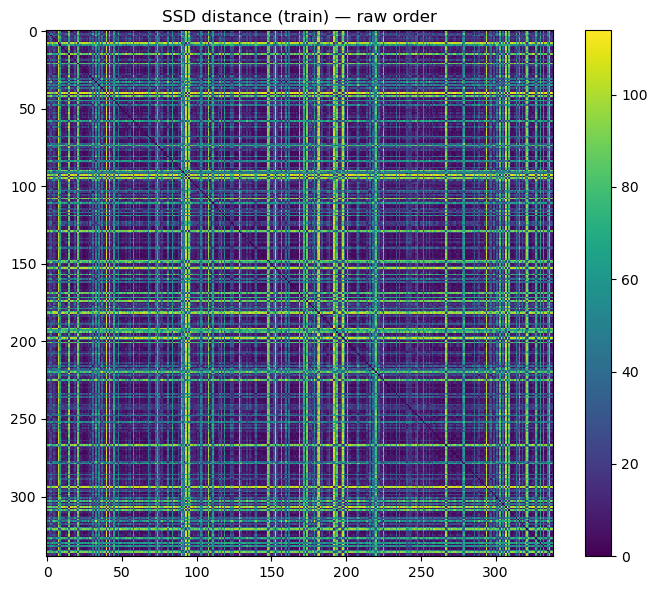

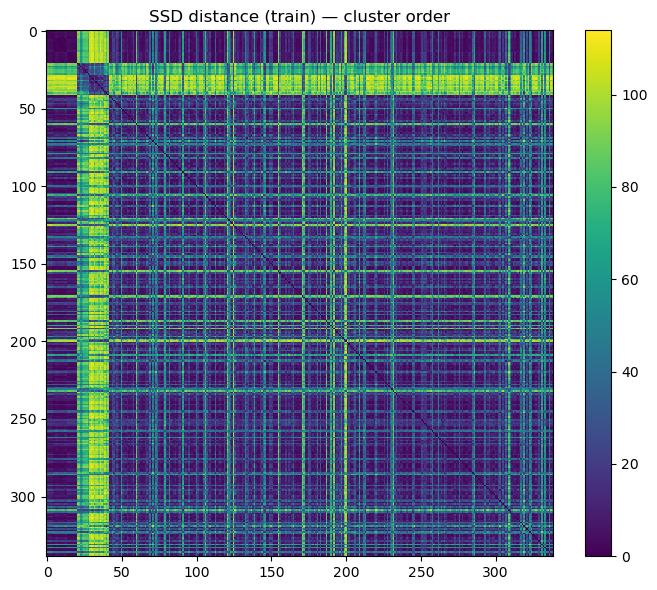

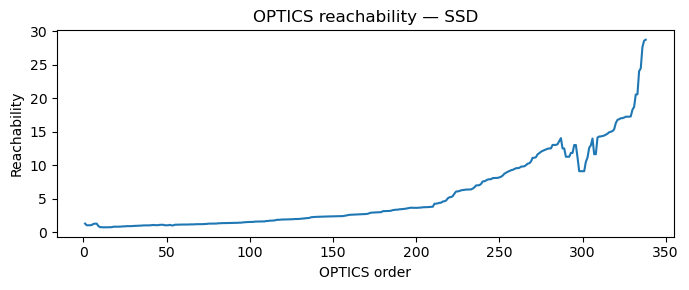

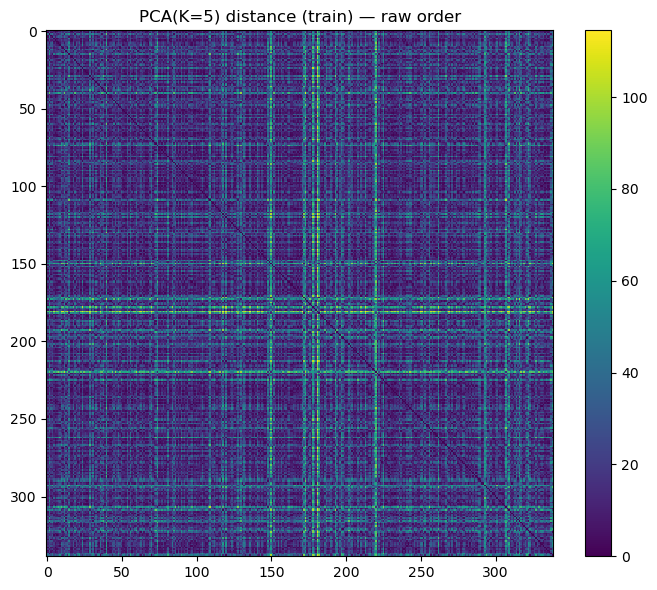

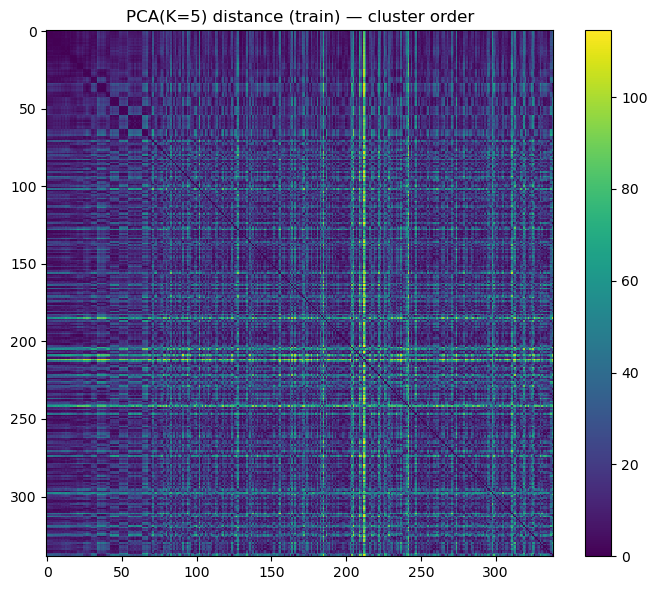

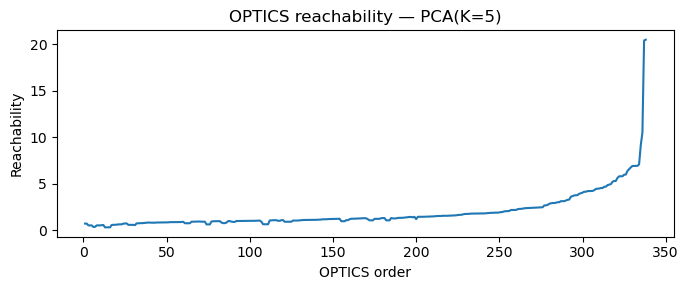

=== OOS (test) stability ===
Adjusted Rand Index: SSD=0.128 | PCA=0.013
=== OOS spread stationarity (ADF p<0.05) ===
SSD=0.018 | PCA=0.059


In [ ]:
art = main(
    ret=ret,
    ret_train=ret_train,
    ret_test=ret_test,
    sectors=None, # optional sector param
    pca_K=5,
    xi=0.05,
    min_samples=5,
    min_cluster_size=2
)


##### Remarks
- Both methods produce few small-size core clusters and many noise clusters.
- We see clearer structure when visualizing the pairwise distance matrix via ordering generated by the OPTICS clustering.
- Reachability plot for PCA-distance shows a sharper spike compared to that of the SSD-distance; this result is also intuitive, since projecting returns on the first five principal components suppresses the idiosyncratic noises, so the resulting space becoems more *homogeneous*. In other words, most assets live in one low-reachability area and some handful of names are very far away (strong outliers under this metric). This produces tiny, tight clusters (seen from darker shaded region in the top left diagonal of the reindexed distance heatmap) and more noise under stricter OPTICS extraction.
- Interstingly, we see a prominent clustering structure by observing the top left of the SSD-distance heatmap; the diagonal shows similarity (close to zero distance) while pairwise blocks along the same x and y axis display much brighter bands (indicating high dissimilarity). This could indicate that our clusters are more significant compared to the previously presented clusters.

## Use of AI in Part 3
- Part 3 relied on ChatGPT Thinking + Web Search Mode 
- We produced skeleton versions of the python code for clustering algorithms, and then created final versions based on these skeletons.
- For the OPTICS algorithm, we hand-picked several features of the replicated paper and asked GPT to design a minimal replication experiment customized to our context and data.
- We refactored our codes and inserted more readable comments by using ChatGPT. 

## References
- Fernandez, Facundo Joel Allia. “Stock Classification Using K-Means Clustering.” Medium, 28 Apr. 2023, medium.com/@facujallia/stock-classification-using-k-means-clustering-8441f75363de.
- Jansen, Stefan. Machine Learning for Algorithmic Trading : Predictive Models to Extract Signals from Market and Alternative Data for Systematic Trading Strategies with Python. Birmingham ; Mumbai, Packt Publishing, 2020.
- Rotondi, Francesco, and Federico Russo. Machine Learning for Pairs Trading: A Clustering-Based Approach. 1 Jan. 2025, papers.ssrn.com/sol3/papers.cfm?abstract_id=5080998, https://doi.org/10.2139/ssrn.5080998.

## All done!

Make sure to follow submission guidelines.